In [74]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [75]:
cons_horario_raw = pd.read_csv(r"C:\Users\toto9\Desktop\Seminário\dados\consumoshorariocodigopostal2821a3080.csv", sep=';')

In [76]:
cons_horario_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4211342 entries, 0 to 4211341
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Data/Hora                object 
 1   Código Postal            object 
 2   Energia ativa (kWh)      float64
 3   Data                     object 
 4   Hora                     object 
 5   Código Postal 4 Dígitos  int64  
 6   Código Postal 3 Dígitos  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 224.9+ MB


In [77]:
# Filtrar o DataFrame para entradas com código postal de 4 dígitos entre 3000 e 3060
df_3000 = cons_horario_raw[(cons_horario_raw['Código Postal 4 Dígitos'] >= 3000) & (cons_horario_raw['Código Postal 4 Dígitos'] <= 3060)]

# Verificar as primeiras entradas do DataFrame filtrado
df_3000.head()

,Data/Hora,Código Postal,Energia ativa (kWh),Data,Hora,Código Postal 4 Dígitos,Código Postal 3 Dígitos
2,2024-02-11T21:00:00+00:00,3000-442,37.200000,2024-02-11,21:00,3000,442
5,2024-02-13T19:00:00+00:00,3045-031,19.344000,2024-02-13,19:00,3045,31
7,2024-02-15T04:00:00+00:00,3020-928,158.598188,2024-02-15,04:00,3020,928
8,2024-02-15T07:00:00+00:00,3050-019,35.708000,2024-02-15,07:00,3050,19
9,2024-02-15T08:00:00+00:00,3030-182,158.569659,2024-02-15,08:00,3030,182


In [78]:
# Garantir que a coluna de tempo está no formato datetime
df_3000['Data/Hora'] = pd.to_datetime(df_3000['Data/Hora'])

# Extrair data e ordenar
df_3000['Dia'] = df_3000['Data/Hora'].dt.date
df_3000.sort_values(['Código Postal', 'Data/Hora'], inplace=True)

# Calcular os intervalos entre registos (por código postal e dia)
df_3000['delta_min'] = df_3000.groupby(['Código Postal', 'Dia'])['Data/Hora'].diff().dt.total_seconds() / 60

# Resumo estatístico por código postal e dia
resumo = df_3000.groupby(['Código Postal', 'Dia']).agg(
    n_registos=('Data/Hora', 'count'),
    consumo_total=('Energia ativa (kWh)', 'sum'),
    intervalo_médio_min=('delta_min', 'mean'),
    intervalo_mínimo_min=('delta_min', 'min'),
    intervalo_máximo_min=('delta_min', 'max'),
    tempo_coberto_horas=('Data/Hora', lambda x: (x.max() - x.min()).total_seconds() / 3600)
).reset_index()

print(resumo.head())

C:\Users\toto9\AppData\Local\Temp\ipykernel_21364\3442392533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3000['Data/Hora'] = pd.to_datetime(df_3000['Data/Hora'])
C:\Users\toto9\AppData\Local\Temp\ipykernel_21364\3442392533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3000['Dia'] = df_3000['Data/Hora'].dt.date
C:\Users\toto9\AppData\Local\Temp\ipykernel_21364\3442392533.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

  Código Postal         Dia  n_registos  consumo_total  intervalo_médio_min  \
0      3000-003  2024-02-01          24     868.093443                 60.0   
1      3000-003  2024-02-02          24     871.732848                 60.0   
2      3000-003  2024-02-03          24     808.850274                 60.0   
3      3000-003  2024-02-04          24     874.886899                 60.0   
4      3000-003  2024-02-05          24     921.983030                 60.0   

   intervalo_mínimo_min  intervalo_máximo_min  tempo_coberto_horas  
0                  60.0                  60.0                 23.0  
1                  60.0                  60.0                 23.0  
2                  60.0                  60.0                 23.0  
3                  60.0                  60.0                 23.0  
4                  60.0                  60.0                 23.0  


## ESTATÍSTICAS DESCRITIVAS

### NÃO NORMALIZADO

c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

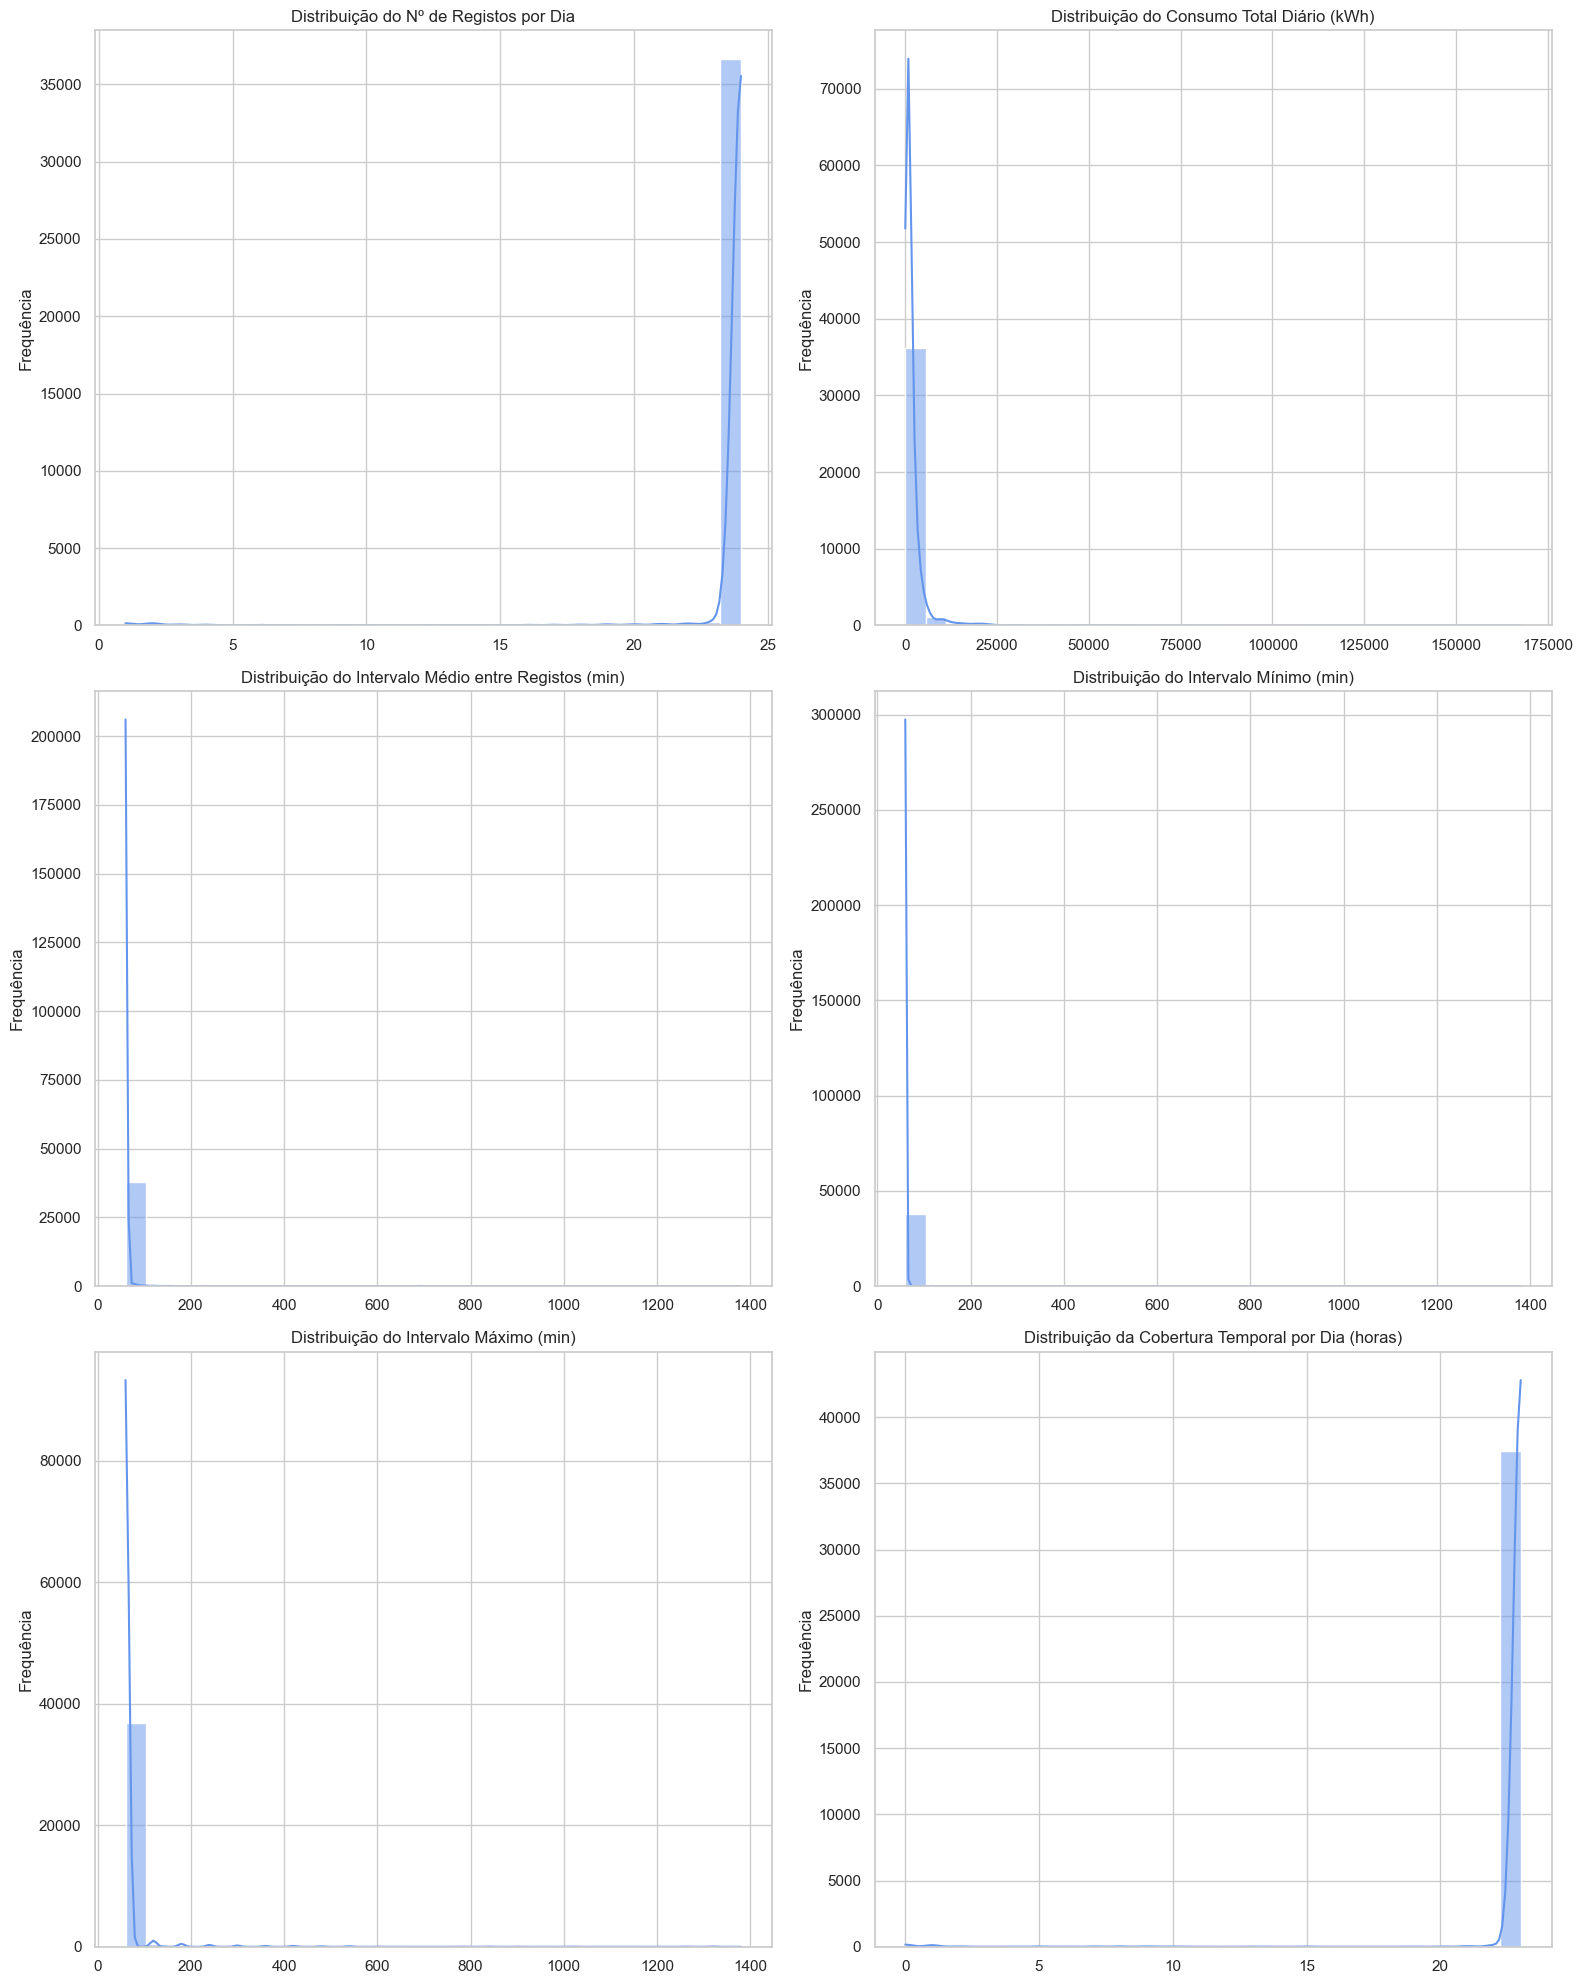

In [79]:
sns.set(style="whitegrid")

# Lista de métricas a visualizar
metricas = [
    'n_registos',
    'consumo_total',
    'intervalo_médio_min',
    'intervalo_mínimo_min',
    'intervalo_máximo_min',
    'tempo_coberto_horas'
]

# Títulos para os gráficos
titulos = {
    'n_registos': 'Distribuição do Nº de Registos por Dia',
    'consumo_total': 'Distribuição do Consumo Total Diário (kWh)',
    'intervalo_médio_min': 'Distribuição do Intervalo Médio entre Registos (min)',
    'intervalo_mínimo_min': 'Distribuição do Intervalo Mínimo (min)',
    'intervalo_máximo_min': 'Distribuição do Intervalo Máximo (min)',
    'tempo_coberto_horas': 'Distribuição da Cobertura Temporal por Dia (horas)'
}

# Tamanho da figura
plt.figure(figsize=(16, 20))

# Criar subplots para cada métrica
for i, metrica in enumerate(metricas, 1):
    plt.subplot(3, 2, i)
    sns.histplot(resumo[metrica], bins=30, kde=True, color='cornflowerblue')
    plt.title(titulos[metrica])
    plt.xlabel('')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### NORMALIZADO

c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

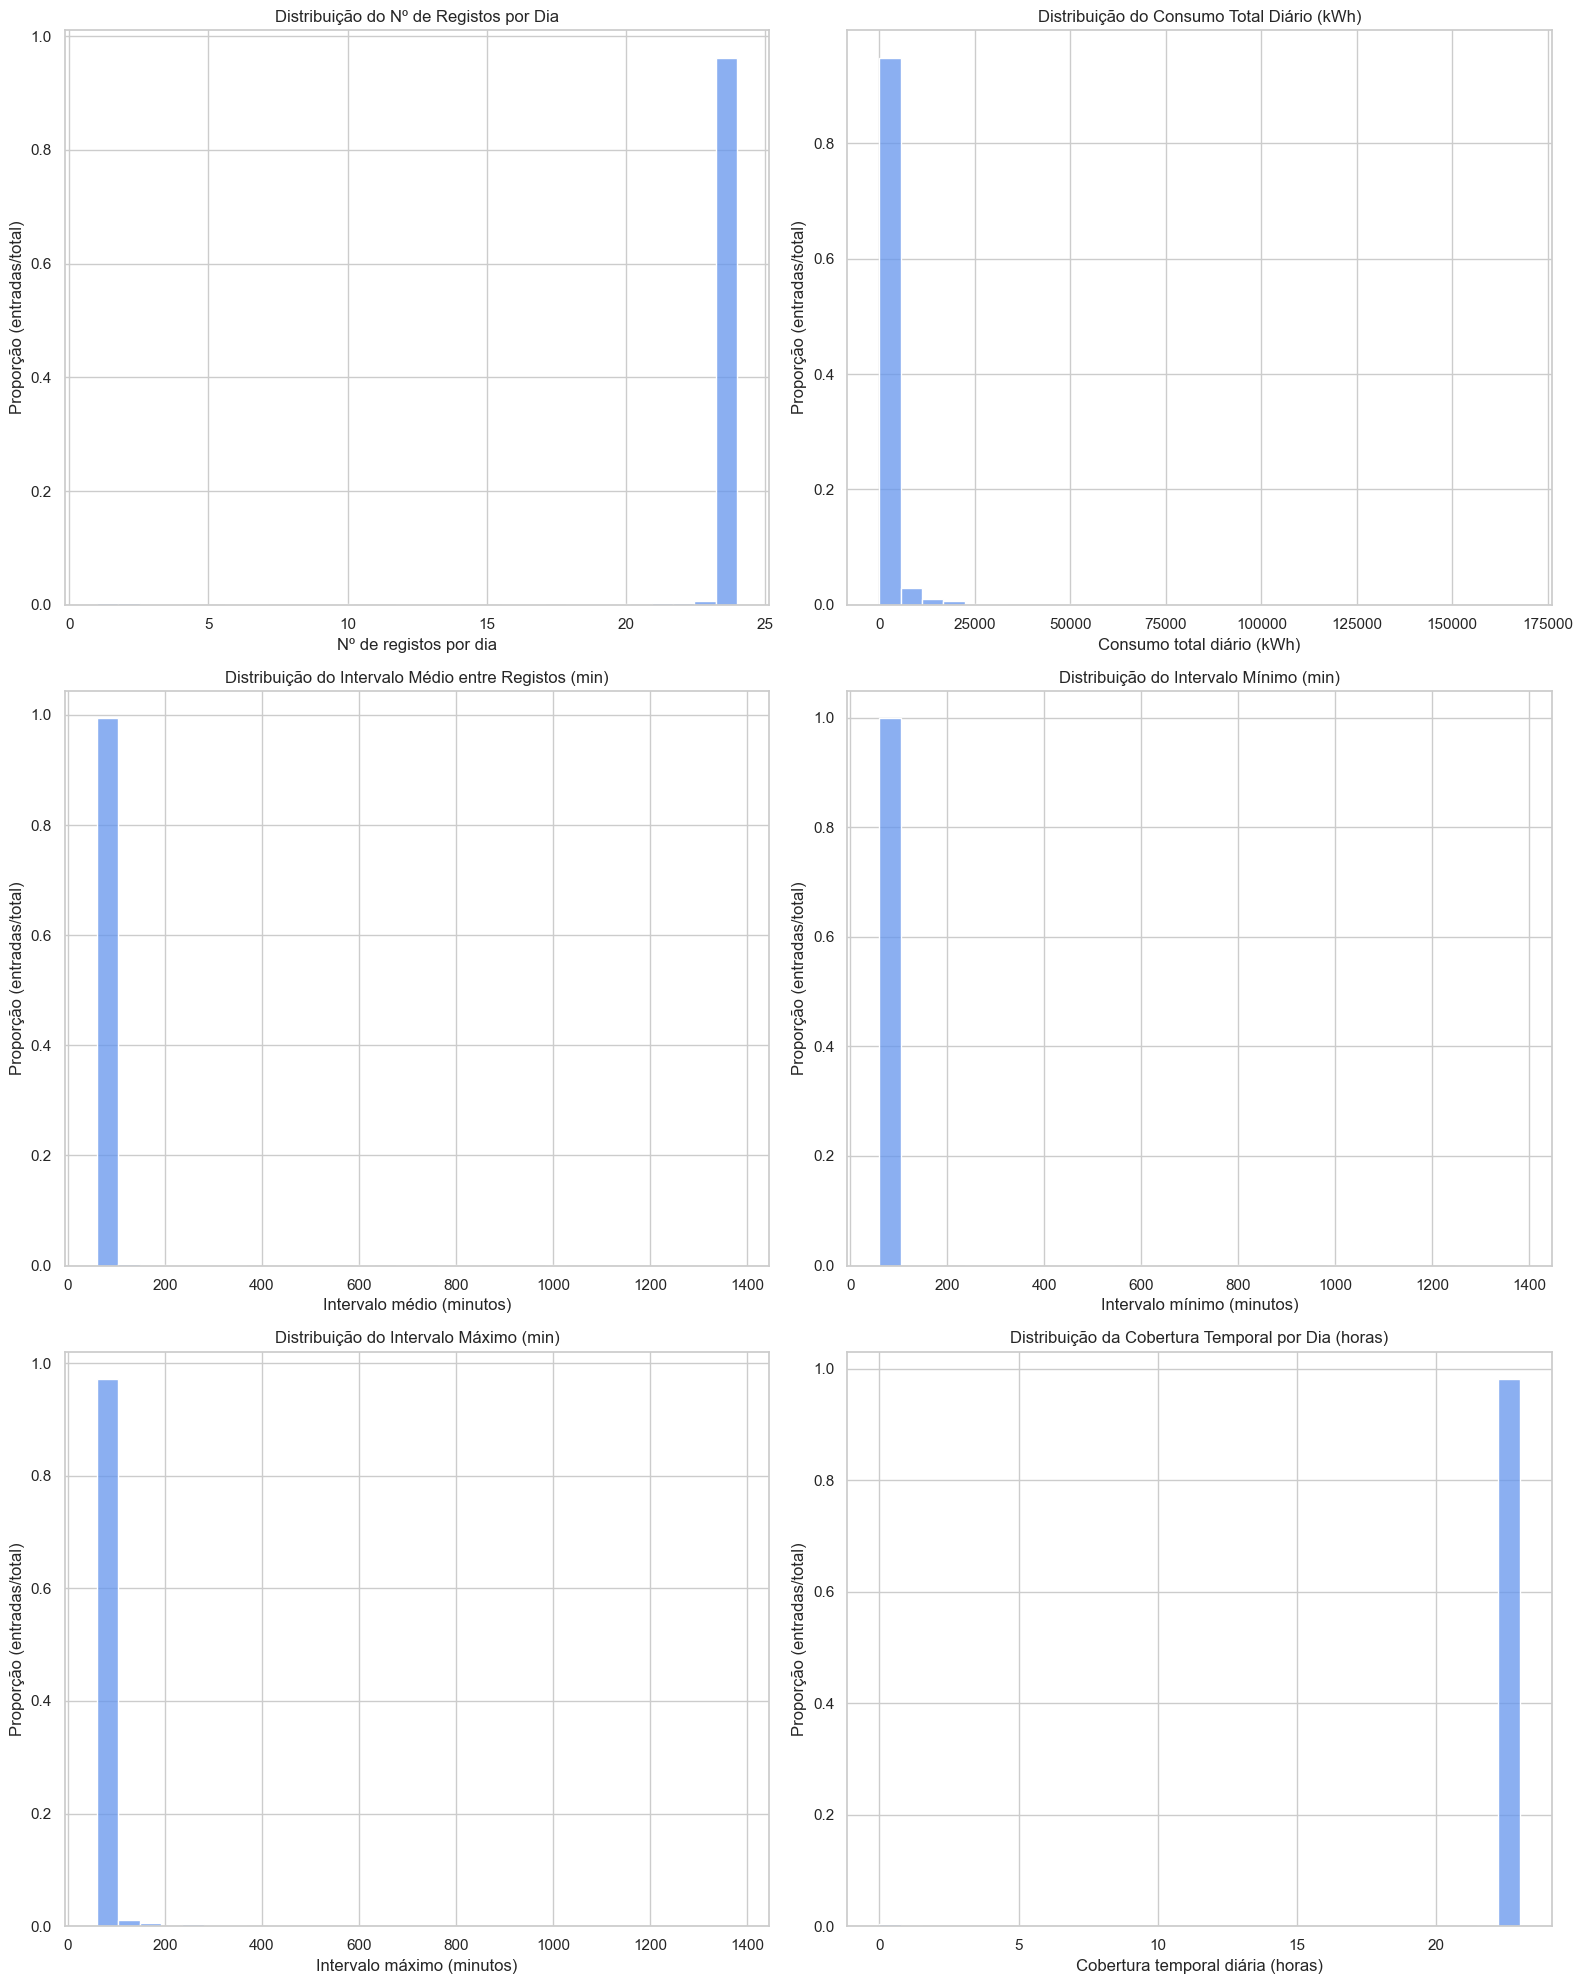

In [80]:

sns.set(style="whitegrid")

metricas = [
    'n_registos',
    'consumo_total',
    'intervalo_médio_min',
    'intervalo_mínimo_min',
    'intervalo_máximo_min',
    'tempo_coberto_horas'
]

titulos = {
    'n_registos': 'Distribuição do Nº de Registos por Dia',
    'consumo_total': 'Distribuição do Consumo Total Diário (kWh)',
    'intervalo_médio_min': 'Distribuição do Intervalo Médio entre Registos (min)',
    'intervalo_mínimo_min': 'Distribuição do Intervalo Mínimo (min)',
    'intervalo_máximo_min': 'Distribuição do Intervalo Máximo (min)',
    'tempo_coberto_horas': 'Distribuição da Cobertura Temporal por Dia (horas)'
}

labels_x = {
    'n_registos': 'Nº de registos por dia',
    'consumo_total': 'Consumo total diário (kWh)',
    'intervalo_médio_min': 'Intervalo médio (minutos)',
    'intervalo_mínimo_min': 'Intervalo mínimo (minutos)',
    'intervalo_máximo_min': 'Intervalo máximo (minutos)',
    'tempo_coberto_horas': 'Cobertura temporal diária (horas)'
}

plt.figure(figsize=(16, 20))

for i, metrica in enumerate(metricas, 1):
    plt.subplot(3, 2, i)
    
    # Obtem valores e normaliza para proporções
    dados = resumo[metrica].dropna()
    total = len(dados)
    sns.histplot(dados, bins=30, stat="probability", kde=False, color='cornflowerblue')
    
    plt.title(titulos[metrica])
    plt.xlabel(labels_x[metrica])
    plt.ylabel('Proporção (entradas/total)')

plt.tight_layout()
plt.show()


## RESUMO EM TABELA, COM MEDIDAS DE TENDÊNCIA CENTRAL, QUARTIS, ETC.

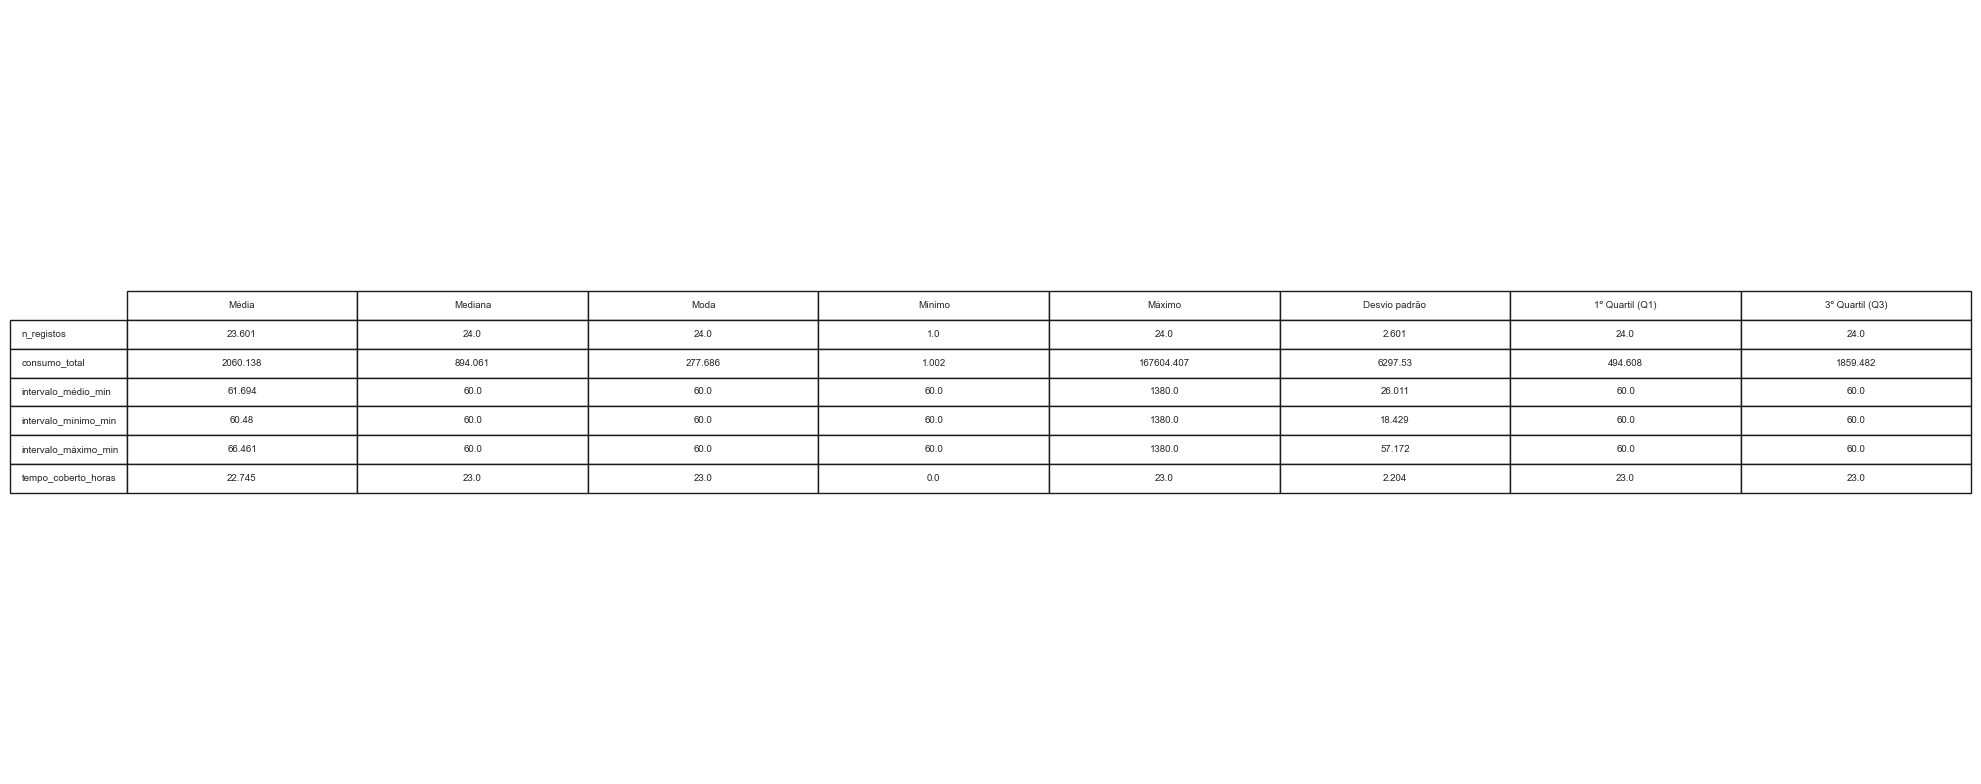

In [81]:
from scipy.stats import mode

# Métricas a analisar
metricas = [
    'n_registos',
    'consumo_total',
    'intervalo_médio_min',
    'intervalo_mínimo_min',
    'intervalo_máximo_min',
    'tempo_coberto_horas'
]

# Tabela descritiva
estatisticas = {}

for metrica in metricas:
    serie = resumo[metrica].dropna()

    moda_val, moda_count = mode(serie, keepdims=True)

    estatisticas[metrica] = {
        'Média': serie.mean(),
        'Mediana': serie.median(),
        'Moda': moda_val[0] if len(moda_val) > 0 else np.nan,
        'Mínimo': serie.min(),
        'Máximo': serie.max(),
        'Desvio padrão': serie.std(),
        '1º Quartil (Q1)': serie.quantile(0.25),
        '3º Quartil (Q3)': serie.quantile(0.75),
    }

# Criar DataFrame final
df_estatisticas = pd.DataFrame(estatisticas).T.round(3)

# Criar imagem da tabela
fig, ax = plt.subplots(figsize=(20, 8))
ax.axis('off')
tbl = ax.table(
    cellText=df_estatisticas.values,
    colLabels=df_estatisticas.columns,
    rowLabels=df_estatisticas.index,
    cellLoc='center',
    loc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(7)
tbl.scale(1.2, 1.4)

plt.tight_layout()
plt.show()

In [82]:
# Garantir que a coluna 'Data' está em formato datetime
df_3000['Data'] = pd.to_datetime(df_3000['Data'])

# Agrupar por código postal e data, contando o número de registos por dia
registos_por_dia = df_3000.groupby(['Código Postal', df_3000['Data'].dt.date]).size()

# Verificar quantos códigos postais têm menos de 23 registos por dia
cp_com_menos_23_registos = registos_por_dia.groupby('Código Postal').apply(lambda x: (x < 23).sum())

# Contar o número de códigos postais que têm pelo menos um dia com menos de 23 registos
num_cp_com_menos_23 = (cp_com_menos_23_registos > 0).sum()

proporcao_menos_23 = (cp_com_menos_23_registos > 0).sum() / len(cp_com_menos_23_registos)

print(f"Proporção de códigos postais que não têm 23 ou mais registos por dia: {proporcao_menos_23:.2f}")

print(f"Número de códigos postais que não têm 23 ou mais registos por dia: {num_cp_com_menos_23}")


Proporção de códigos postais que não têm 23 ou mais registos por dia: 0.14
Número de códigos postais que não têm 23 ou mais registos por dia: 194


C:\Users\toto9\AppData\Local\Temp\ipykernel_21364\620884910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3000['Data'] = pd.to_datetime(df_3000['Data'])


## NOVO DF, SÓ COM OS CODIGOS POSTAIS COM < 23 ENTRADAS POR DIA

In [83]:
# Filtrar os códigos postais que têm menos de 23 registos por dia
cp_com_menos_23_registos = registos_por_dia.groupby('Código Postal').apply(lambda x: (x < 23).sum())

# Obter os códigos postais que têm pelo menos um dia com menos de 23 registos
cp_com_menos_23 = cp_com_menos_23_registos[cp_com_menos_23_registos > 0].index

# Filtrar o dataset original para incluir apenas os códigos postais com menos de 23 registos por dia
df_menos_23_registos = df_3000[df_3000['Código Postal'].isin(cp_com_menos_23)].copy()

# Verificar as primeiras linhas do novo dataset
print(df_menos_23_registos.head())

                        Data/Hora Código Postal  Energia ativa (kWh)  \
2629069 2024-02-07 01:00:00+00:00      3000-010               10.840   
4025087 2024-02-07 02:00:00+00:00      3000-010               15.786   
7293    2024-02-07 03:00:00+00:00      3000-010               10.032   
722930  2024-02-07 04:00:00+00:00      3000-010               14.702   
1436195 2024-02-07 05:00:00+00:00      3000-010               11.748   

              Data   Hora  Código Postal 4 Dígitos  Código Postal 3 Dígitos  \
2629069 2024-02-07  01:00                     3000                       10   
4025087 2024-02-07  02:00                     3000                       10   
7293    2024-02-07  03:00                     3000                       10   
722930  2024-02-07  04:00                     3000                       10   
1436195 2024-02-07  05:00                     3000                       10   

                Dia  delta_min  
2629069  2024-02-07        NaN  
4025087  2024-02-07       

In [84]:
# Garantir que a coluna de tempo está no formato datetime
df_menos_23_registos['Data/Hora'] = pd.to_datetime(df_menos_23_registos['Data/Hora'])

# Extrair data e ordenar
df_menos_23_registos['Dia'] = df_menos_23_registos['Data/Hora'].dt.date
df_menos_23_registos.sort_values(['Código Postal', 'Data/Hora'], inplace=True)

# Calcular os intervalos entre registos (por código postal e dia)
df_menos_23_registos['delta_min'] = df_menos_23_registos.groupby(['Código Postal', 'Dia'])['Data/Hora'].diff().dt.total_seconds() / 60

# Resumo estatístico por código postal e dia
resumo_menosde23 = df_menos_23_registos.groupby(['Código Postal', 'Dia']).agg(
    n_registos=('Data/Hora', 'count'),
    consumo_total=('Energia ativa (kWh)', 'sum'),
    intervalo_médio_min=('delta_min', 'mean'),
    intervalo_mínimo_min=('delta_min', 'min'),
    intervalo_máximo_min=('delta_min', 'max'),
    tempo_coberto_horas=('Data/Hora', lambda x: (x.max() - x.min()).total_seconds() / 3600)
).reset_index()

print(resumo_menosde23.head())

  Código Postal         Dia  n_registos  consumo_total  intervalo_médio_min  \
0      3000-010  2024-02-07          23        787.420                 60.0   
1      3000-010  2024-02-08          21        587.706                 60.0   
2      3000-010  2024-02-09           8        156.514                 60.0   
3      3000-010  2024-02-10          24        777.964                 60.0   
4      3000-010  2024-02-11          24        676.980                 60.0   

   intervalo_mínimo_min  intervalo_máximo_min  tempo_coberto_horas  
0                  60.0                  60.0                 22.0  
1                  60.0                  60.0                 20.0  
2                  60.0                  60.0                  7.0  
3                  60.0                  60.0                 23.0  
4                  60.0                  60.0                 23.0  


### ESTATÍSTICAS DESCRITIVAS DO SUBCONJUNTO IMPERFEITO

c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

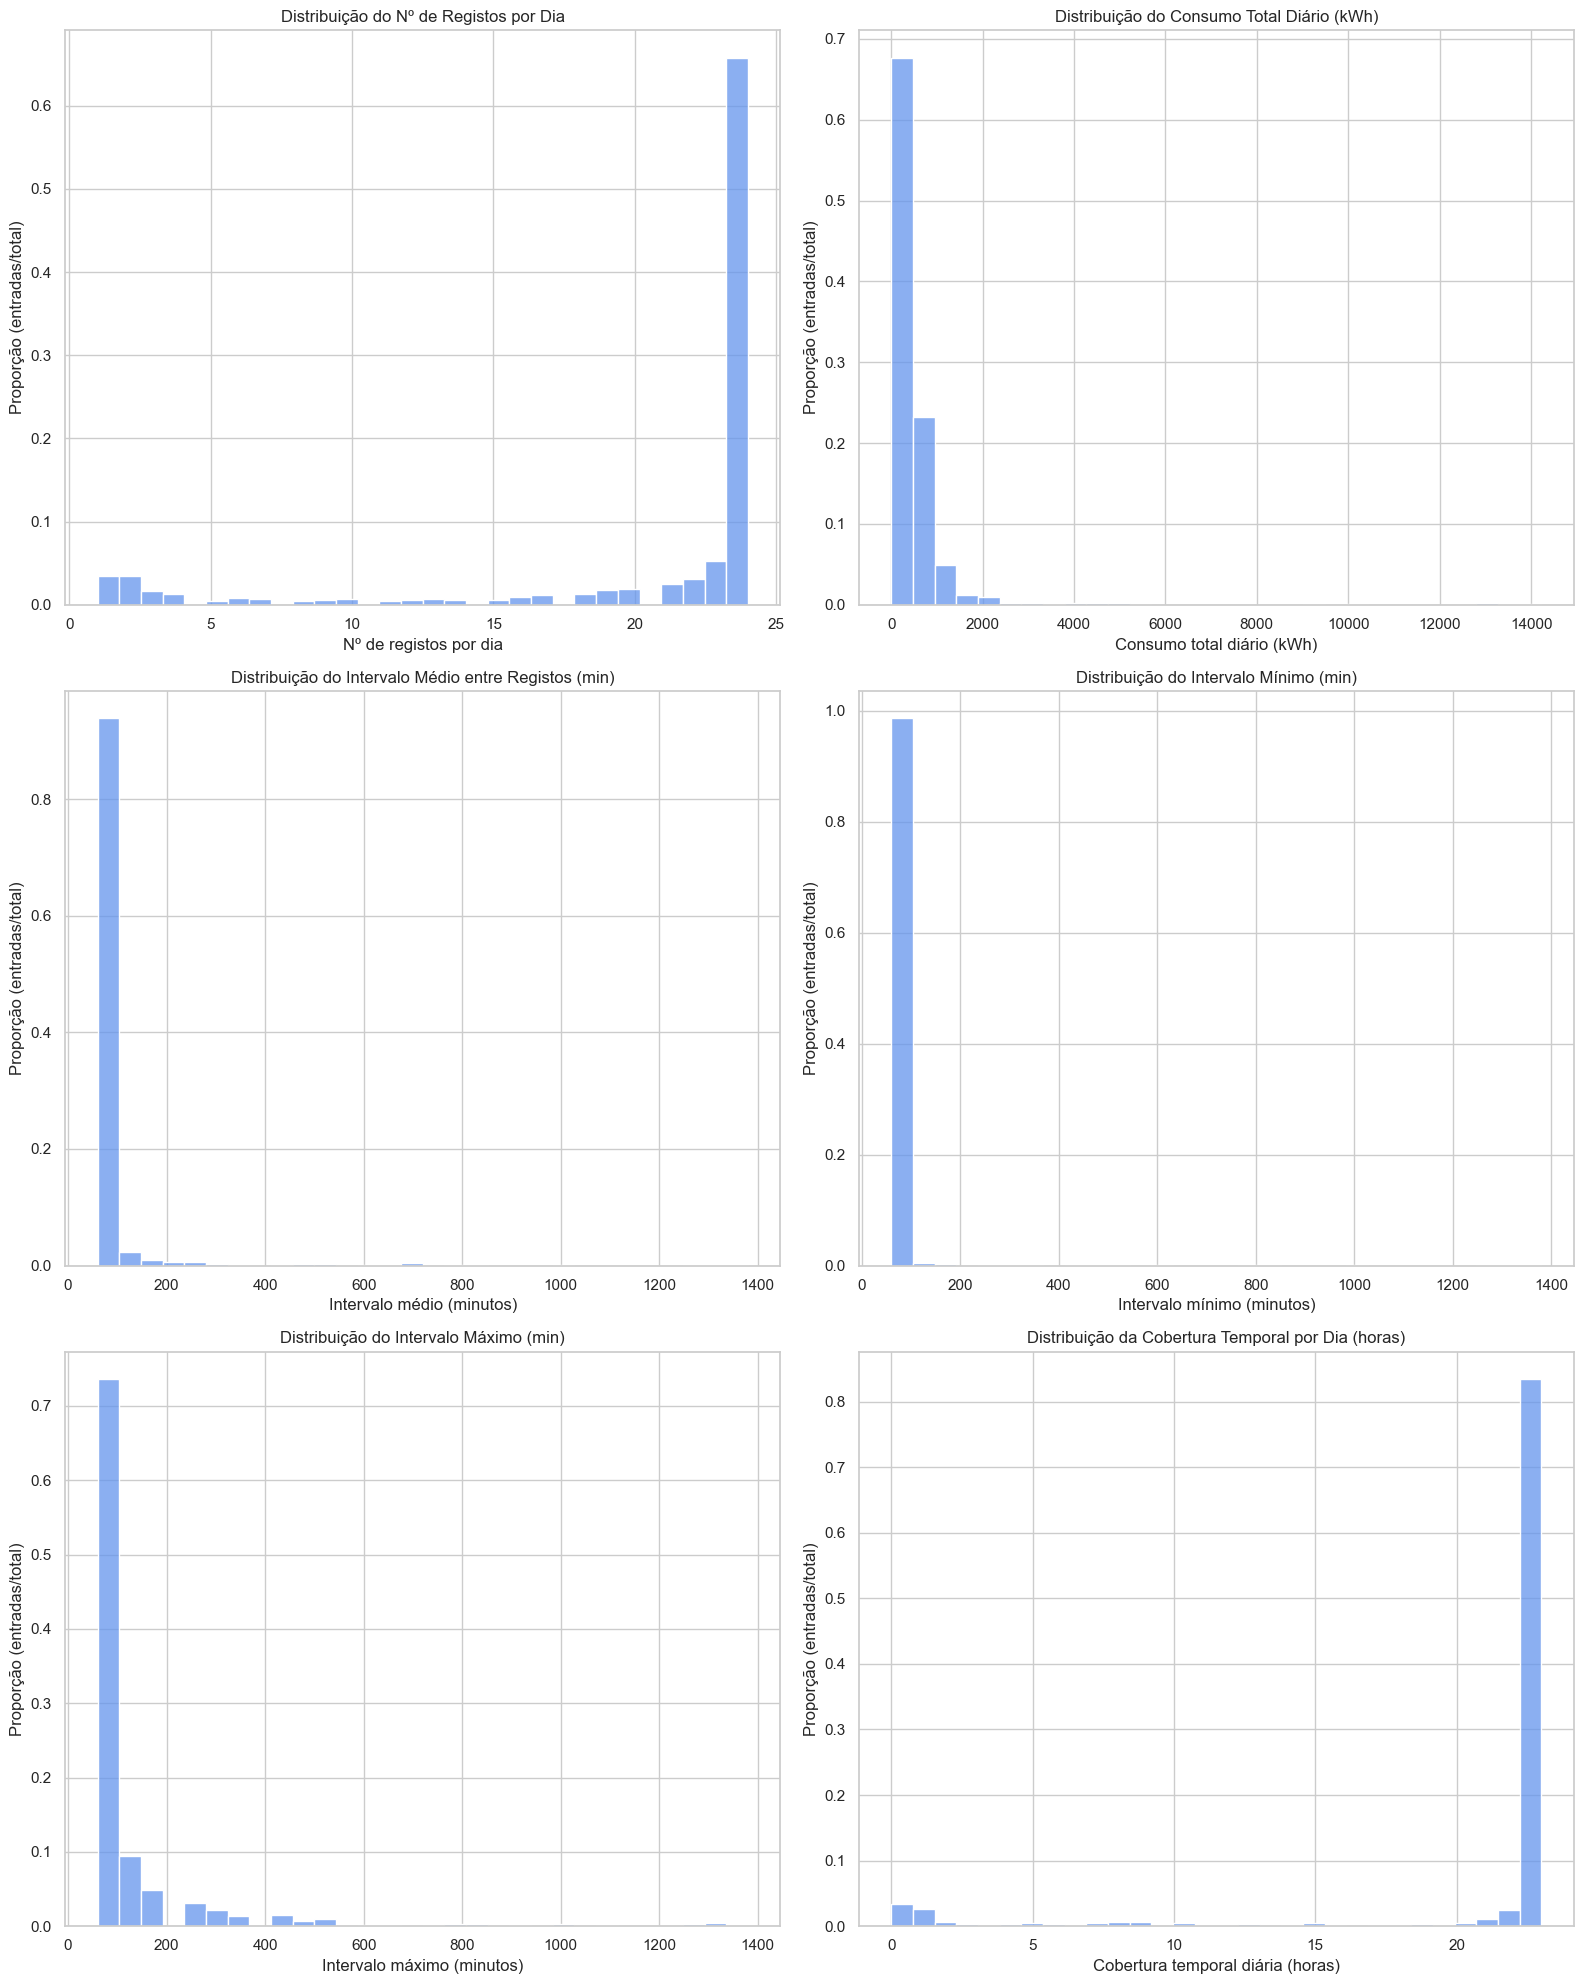

In [85]:

sns.set(style="whitegrid")

metricas23 = [
    'n_registos',
    'consumo_total',
    'intervalo_médio_min',
    'intervalo_mínimo_min',
    'intervalo_máximo_min',
    'tempo_coberto_horas'
]

titulos23 = {
    'n_registos': 'Distribuição do Nº de Registos por Dia',
    'consumo_total': 'Distribuição do Consumo Total Diário (kWh)',
    'intervalo_médio_min': 'Distribuição do Intervalo Médio entre Registos (min)',
    'intervalo_mínimo_min': 'Distribuição do Intervalo Mínimo (min)',
    'intervalo_máximo_min': 'Distribuição do Intervalo Máximo (min)',
    'tempo_coberto_horas': 'Distribuição da Cobertura Temporal por Dia (horas)'
}

labels_x23 = {
    'n_registos': 'Nº de registos por dia',
    'consumo_total': 'Consumo total diário (kWh)',
    'intervalo_médio_min': 'Intervalo médio (minutos)',
    'intervalo_mínimo_min': 'Intervalo mínimo (minutos)',
    'intervalo_máximo_min': 'Intervalo máximo (minutos)',
    'tempo_coberto_horas': 'Cobertura temporal diária (horas)'
}

plt.figure(figsize=(16, 20))

for i, metrica in enumerate(metricas23, 1):
    plt.subplot(3, 2, i)
    
    # Obtem valores e normaliza para proporções
    dados = resumo_menosde23[metrica].dropna()
    total = len(dados)
    sns.histplot(dados, bins=30, stat="probability", kde=False, color='cornflowerblue')
    
    plt.title(titulos[metrica])
    plt.xlabel(labels_x[metrica])
    plt.ylabel('Proporção (entradas/total)')

plt.tight_layout()
plt.show()

## VOLTANDO AOS CODIGOS POSTAIS 'PERFEITOS'. ESTATÍSTICA DOS CONSUMOS

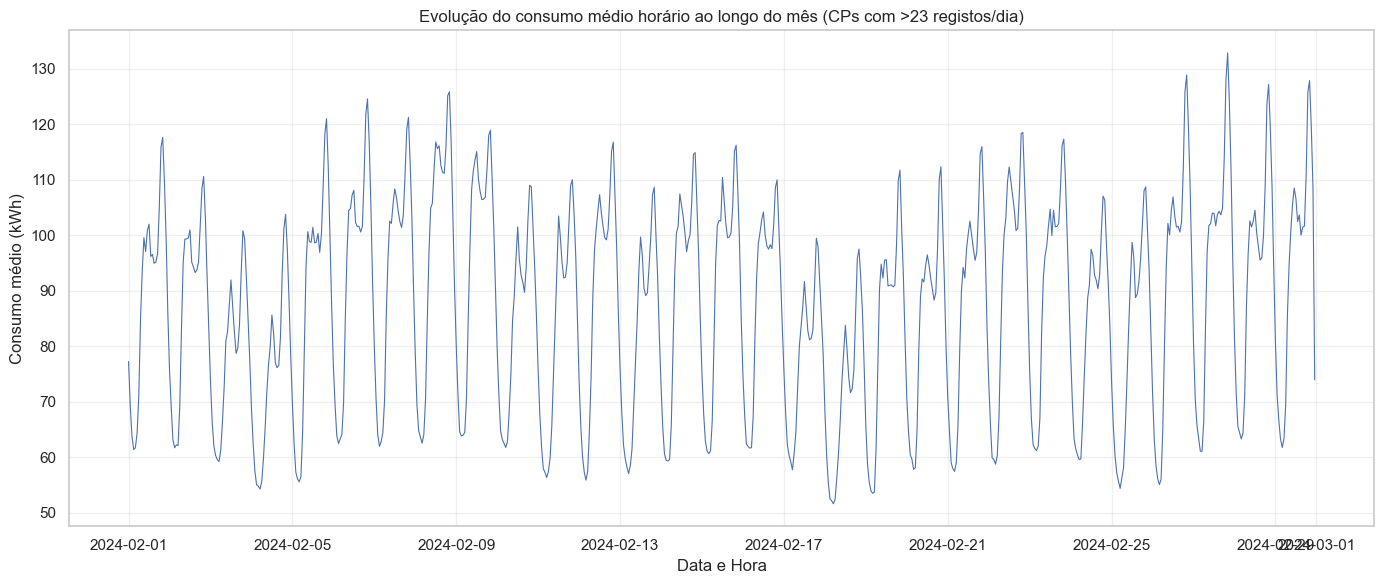

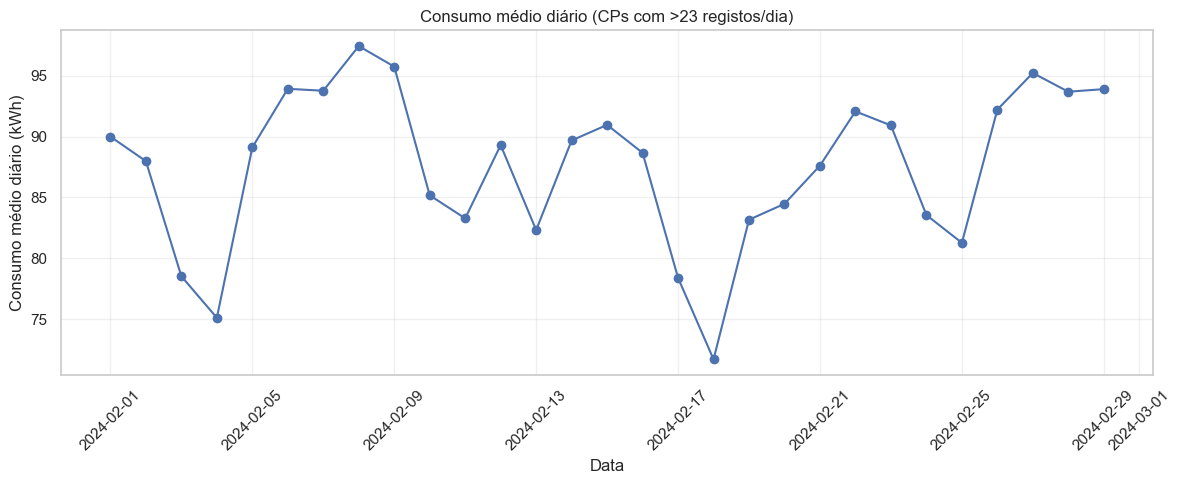

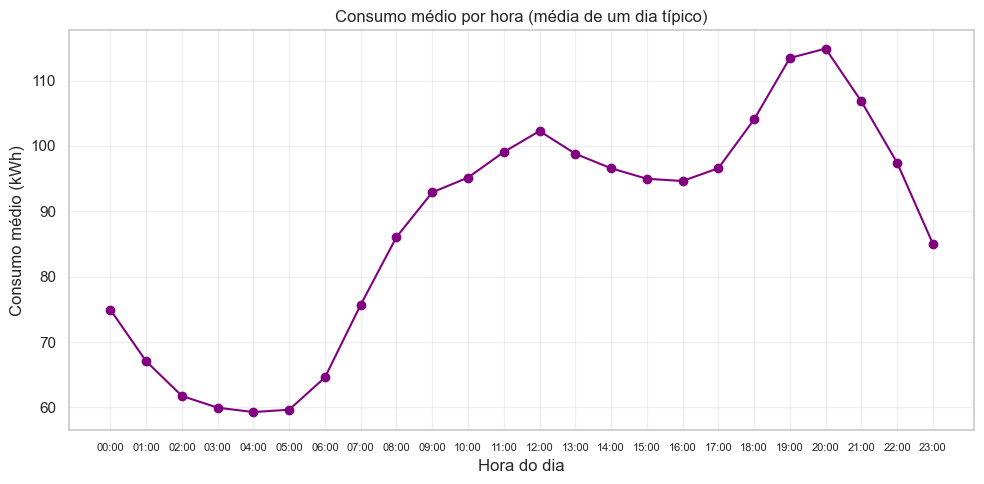

In [86]:


# Filtrar os códigos postais com mais de 23 entradas por dia
cp_com_mais_23_registos = registos_por_dia.groupby('Código Postal').apply(lambda x: (x > 23).sum())
cp_com_mais_23 = cp_com_mais_23_registos[cp_com_mais_23_registos > 0].index

# Filtrar o dataset original para os códigos postais com mais de 23 entradas por dia
df_mais_23_registos = df_3000[df_3000['Código Postal'].isin(cp_com_mais_23)].copy()

# Garantir que a coluna 'Data' está em formato de data
df_mais_23_registos['Data'] = pd.to_datetime(df_mais_23_registos['Data'])

# Agrupar por data e código postal para calcular o consumo diário
consumo_diario = df_mais_23_registos.groupby(['Data', 'Código Postal'])['Energia ativa (kWh)'].sum().reset_index()

# Usar diretamente a coluna de datetime completa
df_mais_23_registos['Data/Hora'] = pd.to_datetime(df_mais_23_registos['Data/Hora'])

# Agrupar por Data/Hora e calcular média de consumo entre todos os códigos postais
media_horaria_total = df_mais_23_registos.groupby('Data/Hora')['Energia ativa (kWh)'].mean().reset_index()

# Plotar gráfico de linha com a evolução do consumo médio horário
plt.figure(figsize=(14, 6))
plt.plot(media_horaria_total['Data/Hora'], media_horaria_total['Energia ativa (kWh)'], linewidth=0.8)
plt.title('Evolução do consumo médio horário ao longo do mês (CPs com >23 registos/dia)')
plt.xlabel('Data e Hora')
plt.ylabel('Consumo médio (kWh)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Extrair a data (sem horas) da coluna datetime
media_horaria_total['Data'] = media_horaria_total['Data/Hora'].dt.date

# Agrupar por dia e calcular a média diária dos consumos médios horários
media_diaria = media_horaria_total.groupby('Data')['Energia ativa (kWh)'].mean().reset_index()

# Gráfico de linha com a média diária
plt.figure(figsize=(12, 5))
plt.plot(media_diaria['Data'], media_diaria['Energia ativa (kWh)'], marker='o', linestyle='-')
plt.title('Consumo médio diário (CPs com >23 registos/dia)')
plt.xlabel('Data')
plt.ylabel('Consumo médio diário (kWh)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcular a média de consumo por hora (média de todas as observações dessa hora ao longo do mês)
media_por_hora = (
    df_mais_23_registos
    .groupby('Hora')['Energia ativa (kWh)']
    .mean()
    .reset_index(name='Consumo médio (kWh)')
)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(media_por_hora['Hora'], media_por_hora['Consumo médio (kWh)'],
         marker='o', linestyle='-', color='purple')
plt.title('Consumo médio por hora (média de um dia típico)')
plt.xlabel('Hora do dia')
plt.ylabel('Consumo médio (kWh)')
plt.xticks(range(0, 24), fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# RESUMO DO DATASET DE CP DE 4 DIG - ANO TODO

In [87]:
consum_3000 = pd.read_csv(r"C:\Users\toto9\Downloads\consumos_horario_codigo_postal.csv", sep=";")

In [88]:
# Garantir que a coluna está como string
consum_3000['Código Postal'] = consum_3000['Código Postal'].astype(str)

# Filtrar apenas os códigos postais numéricos
consum_3000 = consum_3000[consum_3000['Código Postal'].str.isnumeric()].copy()

# Converter a coluna para inteiro
consum_3000['Código Postal'] = consum_3000['Código Postal'].astype(int)

# Filtrar os códigos postais entre 2900 e 3100
df_filtrado = consum_3000[(consum_3000['Código Postal'] >= 3000) & (consum_3000['Código Postal'] <= 3060)]

# Ordenar por ordem crescente
df_ordenado = df_filtrado.sort_values(by='Código Postal')

# Visualizar
df_ordenado

,Data/Hora,Data,Hora,Código Postal,Energia ativa (kWh),Dia da Semana
3727223,2023-06-03T11:00:00+01:00,2023-06-03,11:00,3000,15753.498911,Sábado
3727111,2022-12-26T06:00:00+00:00,2022-12-26,06:00,3000,9776.402350,Segunda
3726899,2023-07-09T03:00:00+01:00,2023-07-09,03:00,3000,9024.159589,Domingo
3726893,2023-09-10T14:00:00+01:00,2023-09-10,14:00,3000,13305.481289,Domingo
3726749,2023-08-19T01:00:00+01:00,2023-08-19,01:00,3000,10564.738152,Sábado
...,...,...,...,...,...,...
3724188,2023-08-19T20:00:00+01:00,2023-08-19,20:00,3060,17605.672618,Sábado
2797371,2023-03-23T20:00:00+00:00,2023-03-23,20:00,3060,30806.731081,Quinta
2797071,2023-05-15T20:00:00+01:00,2023-05-15,20:00,3060,26945.679404,Segunda
2796914,2022-11-15T17:00:00+00:00,2022-11-15,17:00,3060,27988.336221,Terça


In [89]:
# Assumindo que tens as colunas 'Data' e 'Hora' separadas
# Primeiro, combinar as colunas 'Data' e 'Hora' em uma só coluna 'Data/Hora'

df_ordenado['Data/Hora'] = pd.to_datetime(df_ordenado['Data'].astype(str) + ' ' + df_ordenado['Hora'].astype(str))

# Agora, garantir que a coluna 'Data/Hora' está no formato datetime
df_ordenado['Data/Hora'] = pd.to_datetime(df_ordenado['Data/Hora'])

# Verificar se foi criada corretamente
print(df_ordenado[['Data', 'Hora', 'Data/Hora']].head())

# Extrair data e ordenar
df_ordenado['Dia'] = df_ordenado['Data/Hora'].dt.date
df_ordenado.sort_values(['Código Postal', 'Data/Hora'], inplace=True)

# Calcular os intervalos entre registos (por código postal e dia)
df_ordenado['delta_min'] = df_ordenado.groupby(['Código Postal', 'Dia'])['Data/Hora'].diff().dt.total_seconds() / 60

# Resumo estatístico por código postal e dia
resumo4dig = df_ordenado.groupby(['Código Postal', 'Dia']).agg(
    n_registos4dig=('Data/Hora', 'count'),
    consumo_total4dig=('Energia ativa (kWh)', 'sum'),
    intervalo_médio_min4dig=('delta_min', 'mean'),
    intervalo_mínimo_min4dig=('delta_min', 'min'),
    intervalo_máximo_min4dig=('delta_min', 'max'),
    tempo_coberto_horas4dig=('Data/Hora', lambda x: (x.max() - x.min()).total_seconds() / 3600)
).reset_index()

print(resumo4dig.head())

               Data   Hora           Data/Hora
3727223  2023-06-03  11:00 2023-06-03 11:00:00
3727111  2022-12-26  06:00 2022-12-26 06:00:00
3726899  2023-07-09  03:00 2023-07-09 03:00:00
3726893  2023-09-10  14:00 2023-09-10 14:00:00
3726749  2023-08-19  01:00 2023-08-19 01:00:00
   Código Postal         Dia  n_registos4dig  consumo_total4dig  \
0           3000  2022-11-01              24      258559.110334   
1           3000  2022-11-02              24      343013.853757   
2           3000  2022-11-03              24      334729.629834   
3           3000  2022-11-04              24      352545.654059   
4           3000  2022-11-05              24      316697.142397   

   intervalo_médio_min4dig  intervalo_mínimo_min4dig  \
0                     60.0                      60.0   
1                     60.0                      60.0   
2                     60.0                      60.0   
3                     60.0                      60.0   
4                     60.0         

c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

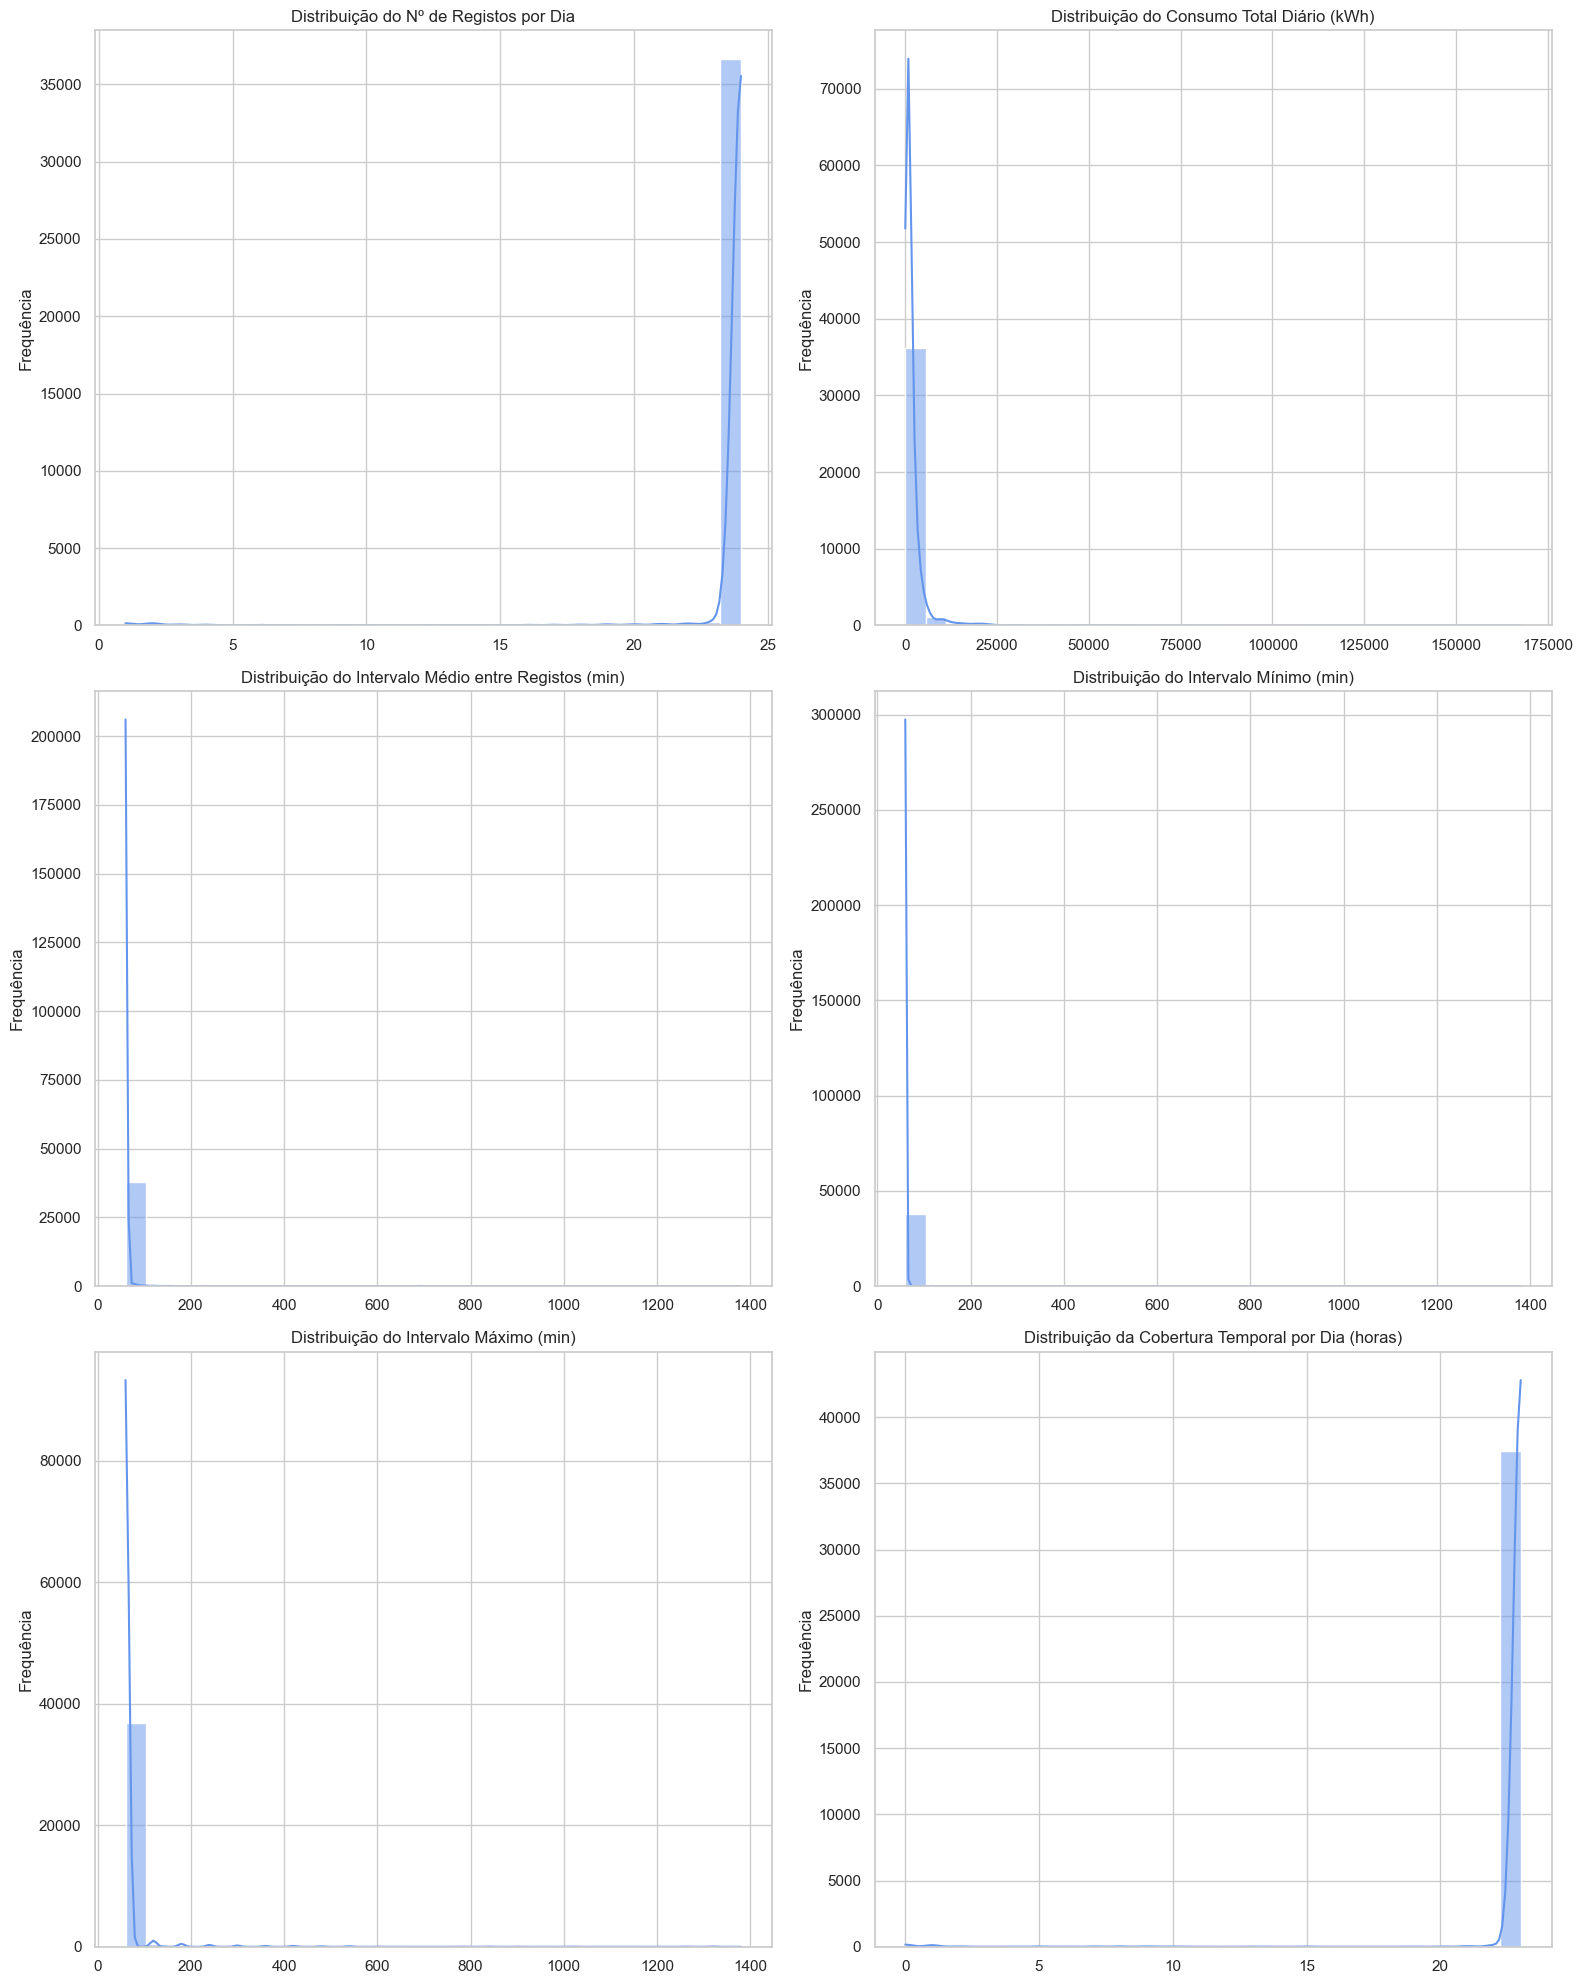

In [90]:
sns.set(style="whitegrid")

# Lista de métricas a visualizar
metricas4dig = [
    'n_registos',
    'consumo_total',
    'intervalo_médio_min',
    'intervalo_mínimo_min',
    'intervalo_máximo_min',
    'tempo_coberto_horas'
]

# Títulos para os gráficos
titulos = {
    'n_registos': 'Distribuição do Nº de Registos por Dia',
    'consumo_total': 'Distribuição do Consumo Total Diário (kWh)',
    'intervalo_médio_min': 'Distribuição do Intervalo Médio entre Registos (min)',
    'intervalo_mínimo_min': 'Distribuição do Intervalo Mínimo (min)',
    'intervalo_máximo_min': 'Distribuição do Intervalo Máximo (min)',
    'tempo_coberto_horas': 'Distribuição da Cobertura Temporal por Dia (horas)'
}

# Tamanho da figura
plt.figure(figsize=(16, 20))

# Criar subplots para cada métrica
for i, metrica in enumerate(metricas4dig, 1):
    plt.subplot(3, 2, i)
    sns.histplot(resumo[metrica], bins=30, kde=True, color='cornflowerblue')
    plt.title(titulos[metrica])
    plt.xlabel('')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### NORMALIZADO

c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

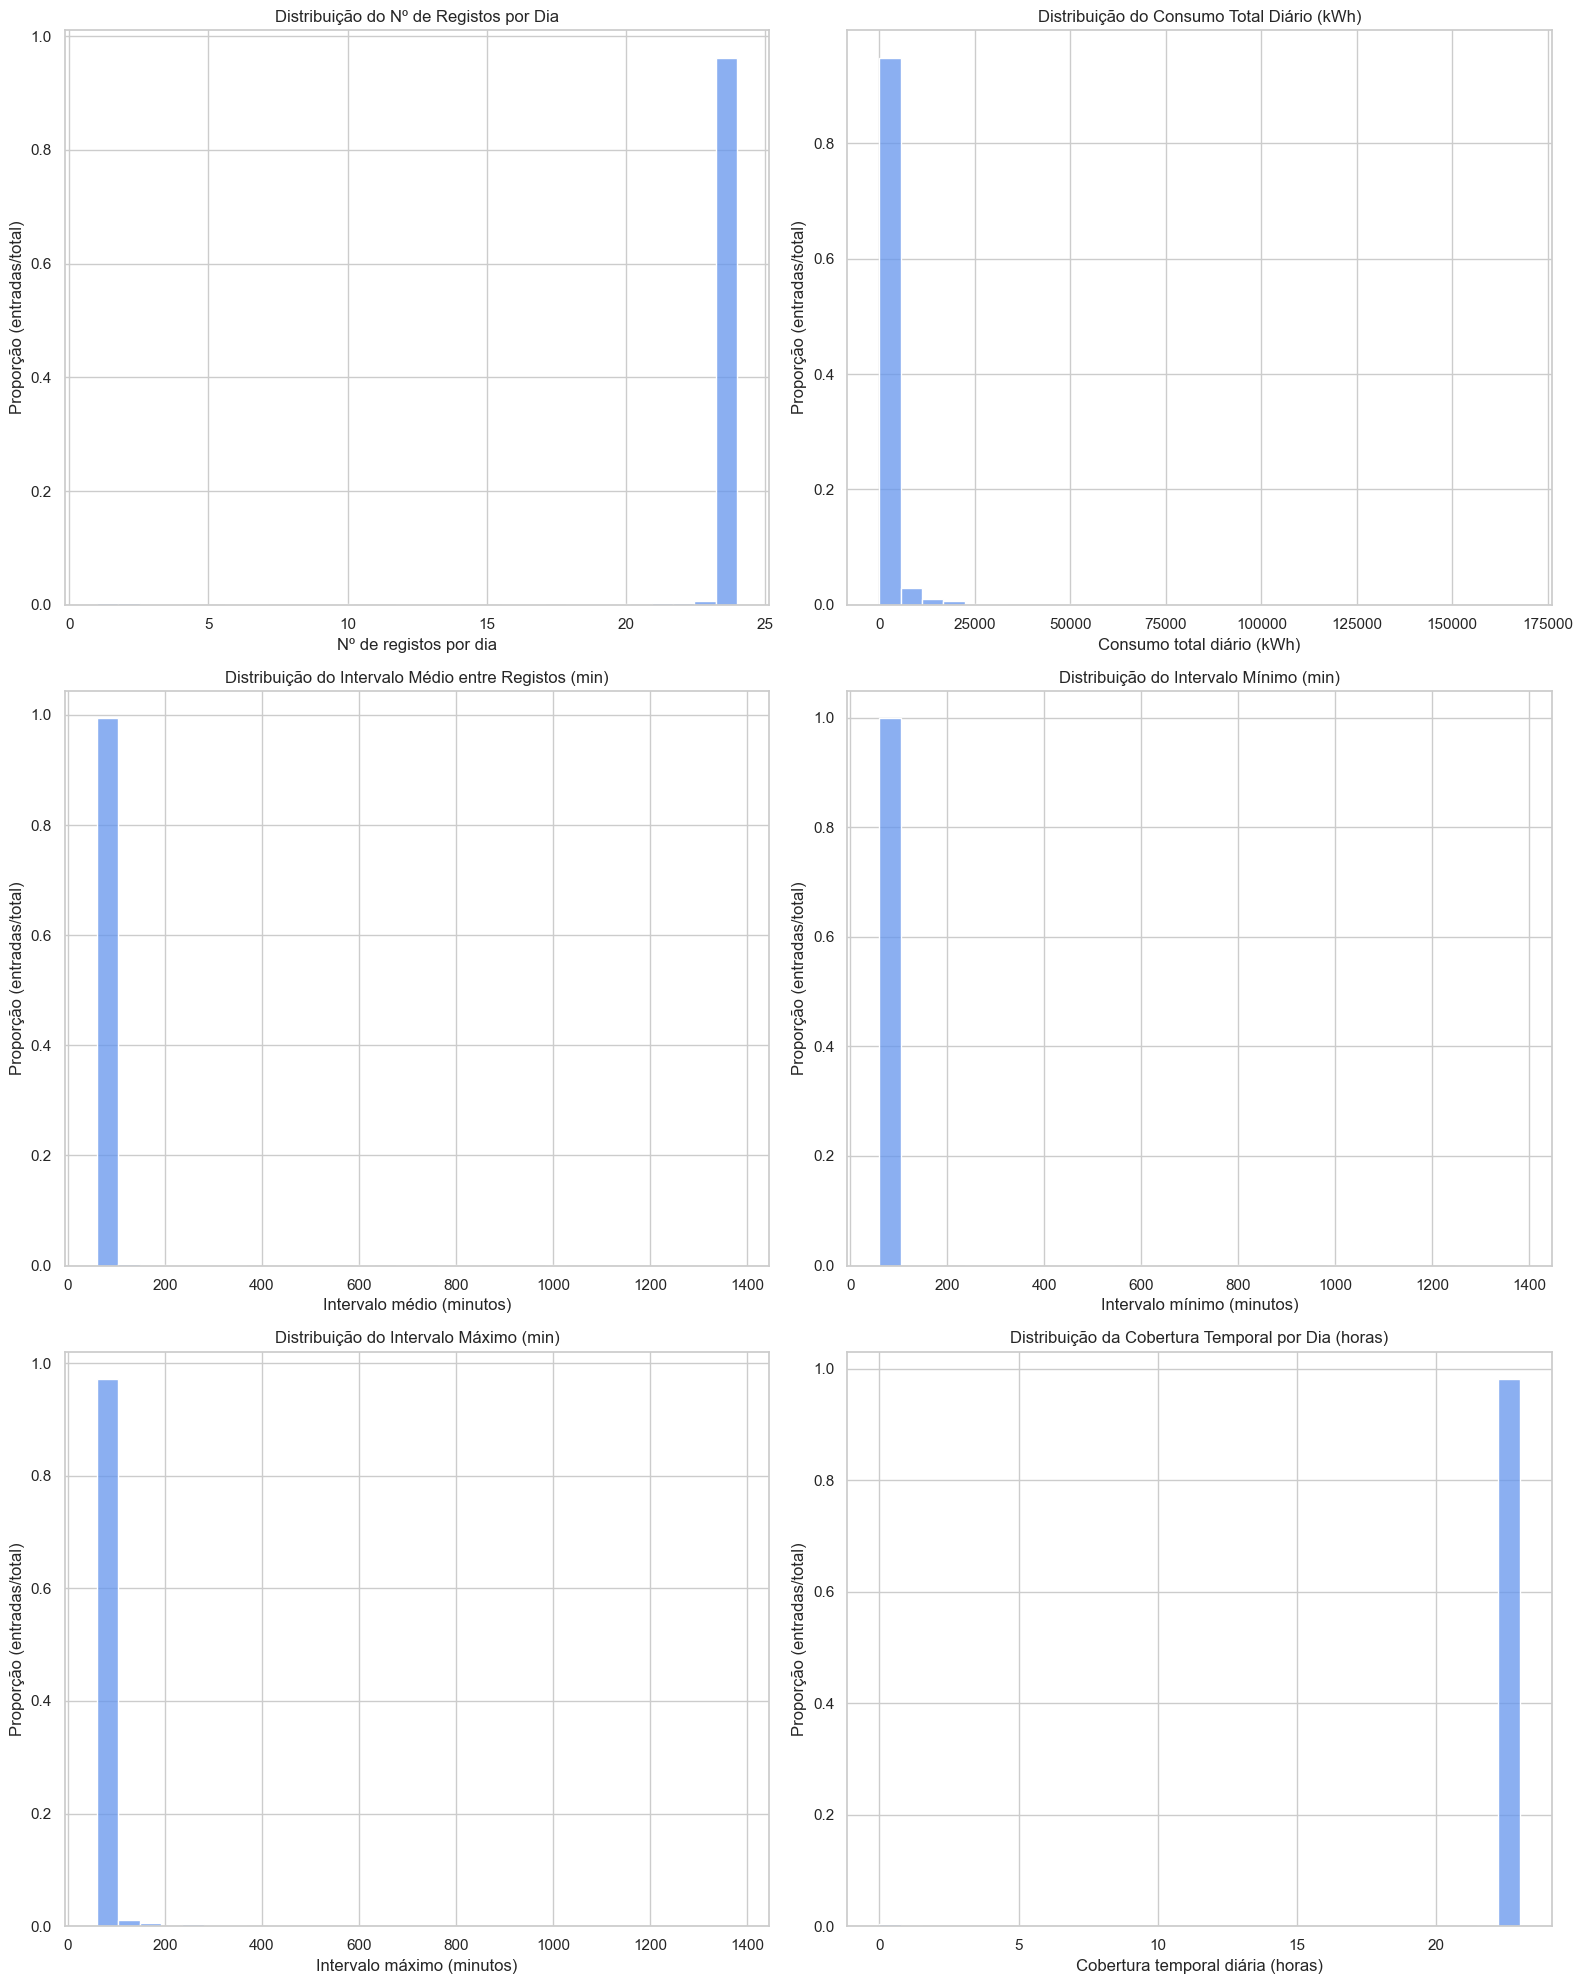

In [91]:

sns.set(style="whitegrid")

metricas4dig = [
    'n_registos',
    'consumo_total',
    'intervalo_médio_min',
    'intervalo_mínimo_min',
    'intervalo_máximo_min',
    'tempo_coberto_horas'
]

titulos = {
    'n_registos': 'Distribuição do Nº de Registos por Dia',
    'consumo_total': 'Distribuição do Consumo Total Diário (kWh)',
    'intervalo_médio_min': 'Distribuição do Intervalo Médio entre Registos (min)',
    'intervalo_mínimo_min': 'Distribuição do Intervalo Mínimo (min)',
    'intervalo_máximo_min': 'Distribuição do Intervalo Máximo (min)',
    'tempo_coberto_horas': 'Distribuição da Cobertura Temporal por Dia (horas)'
}

labels_x = {
    'n_registos': 'Nº de registos por dia',
    'consumo_total': 'Consumo total diário (kWh)',
    'intervalo_médio_min': 'Intervalo médio (minutos)',
    'intervalo_mínimo_min': 'Intervalo mínimo (minutos)',
    'intervalo_máximo_min': 'Intervalo máximo (minutos)',
    'tempo_coberto_horas': 'Cobertura temporal diária (horas)'
}

plt.figure(figsize=(16, 20))

for i, metrica in enumerate(metricas4dig, 1):
    plt.subplot(3, 2, i)
    
    # Obtem valores e normaliza para proporções
    dados = resumo[metrica].dropna()
    total = len(dados)
    sns.histplot(dados, bins=30, stat="probability", kde=False, color='cornflowerblue')
    
    plt.title(titulos[metrica])
    plt.xlabel(labels_x[metrica])
    plt.ylabel('Proporção (entradas/total)')

plt.tight_layout()
plt.show()


## RESUMO EM TABELA, COM MEDIDAS DE TENDÊNCIA CENTRAL, QUARTIS, ETC.

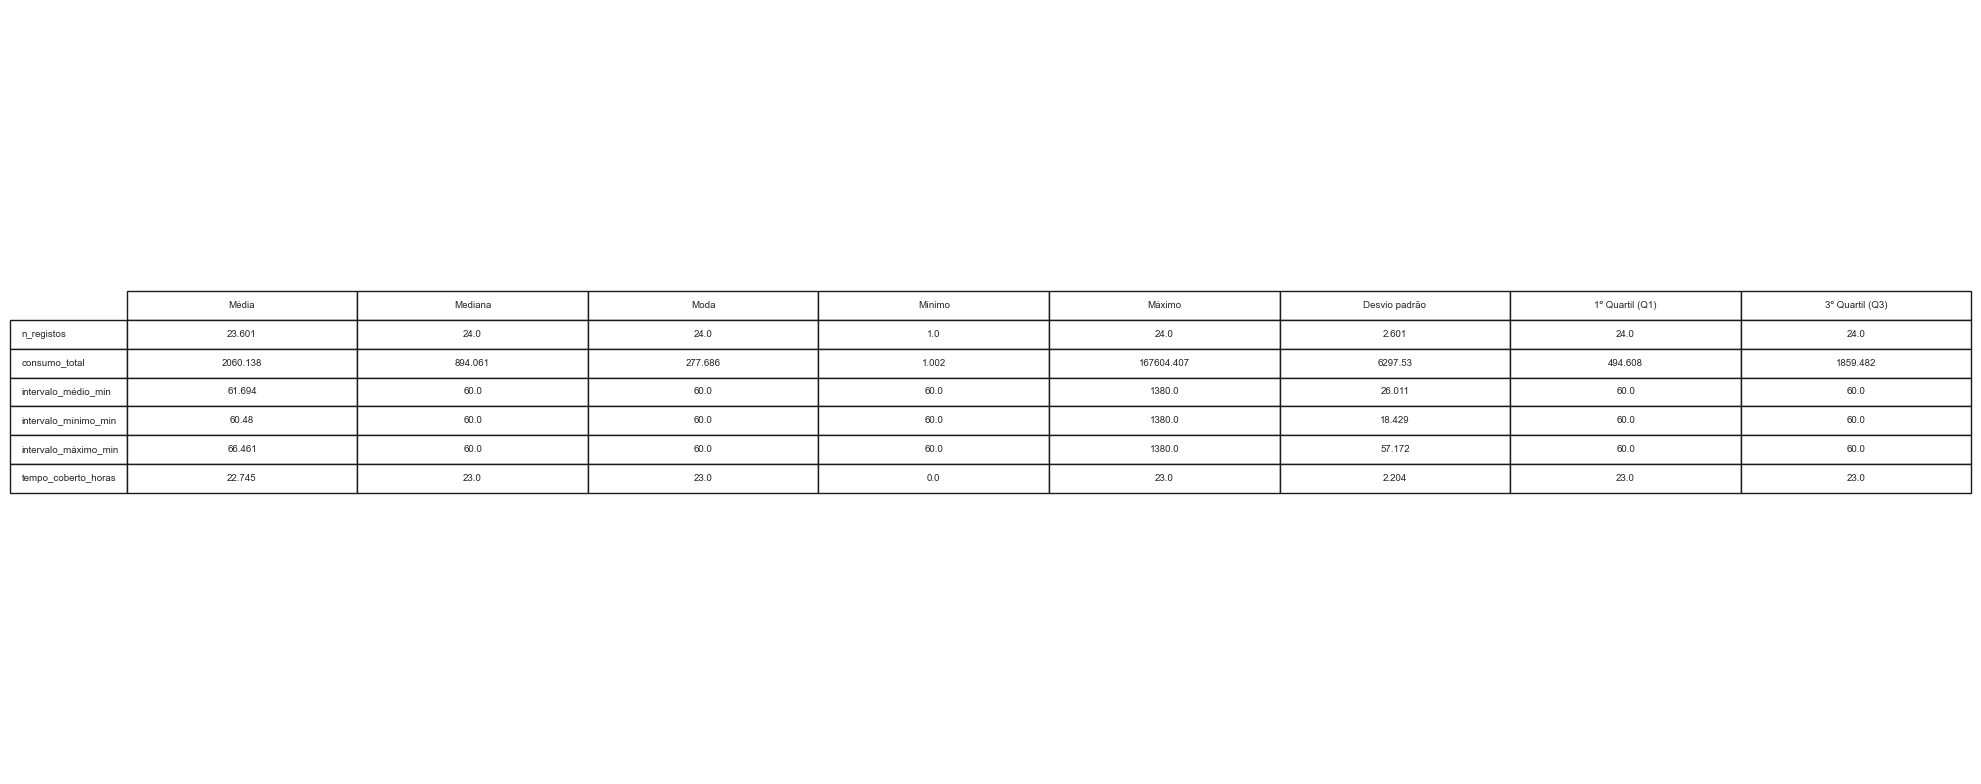

In [92]:
from scipy.stats import mode

# Métricas a analisar
metricas4dig = [
    'n_registos',
    'consumo_total',
    'intervalo_médio_min',
    'intervalo_mínimo_min',
    'intervalo_máximo_min',
    'tempo_coberto_horas'
]

# Tabela descritiva
estatisticas = {}

for metrica in metricas4dig:
    serie = resumo[metrica].dropna()

    moda_val, moda_count = mode(serie, keepdims=True)

    estatisticas[metrica] = {
        'Média': serie.mean(),
        'Mediana': serie.median(),
        'Moda': moda_val[0] if len(moda_val) > 0 else np.nan,
        'Mínimo': serie.min(),
        'Máximo': serie.max(),
        'Desvio padrão': serie.std(),
        '1º Quartil (Q1)': serie.quantile(0.25),
        '3º Quartil (Q3)': serie.quantile(0.75),
    }

# Criar DataFrame final
df_estatisticas4dig = pd.DataFrame(estatisticas).T.round(3)

# Criar imagem da tabela
fig, ax = plt.subplots(figsize=(20, 8))
ax.axis('off')
tbl = ax.table(
    cellText=df_estatisticas.values,
    colLabels=df_estatisticas.columns,
    rowLabels=df_estatisticas.index,
    cellLoc='center',
    loc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(7)
tbl.scale(1.2, 1.4)

plt.tight_layout()
plt.show()

In [93]:
# Garantir que a coluna 'Data' está em formato datetime
df_ordenado['Data'] = pd.to_datetime(df_ordenado['Data'])

# Agrupar por código postal e data, contando o número de registos por dia
registos_por_dia = df_ordenado.groupby(['Código Postal', df_ordenado['Data'].dt.date]).size()

# Verificar quantos códigos postais têm menos de 23 registos por dia
cp_com_menos_23_registos = registos_por_dia.groupby('Código Postal').apply(lambda x: (x < 23).sum())

# Contar o número de códigos postais que têm pelo menos um dia com menos de 23 registos
num_cp_com_menos_23 = (cp_com_menos_23_registos > 0).sum()

proporcao_menos_23 = (cp_com_menos_23_registos > 0).sum() / len(cp_com_menos_23_registos)

print(f"Proporção de códigos postais que não têm 23 ou mais registos por dia: {proporcao_menos_23:.2f}")

print(f"Número de códigos postais que não têm 23 ou mais registos por dia: {num_cp_com_menos_23}")


Proporção de códigos postais que não têm 23 ou mais registos por dia: 0.00
Número de códigos postais que não têm 23 ou mais registos por dia: 0


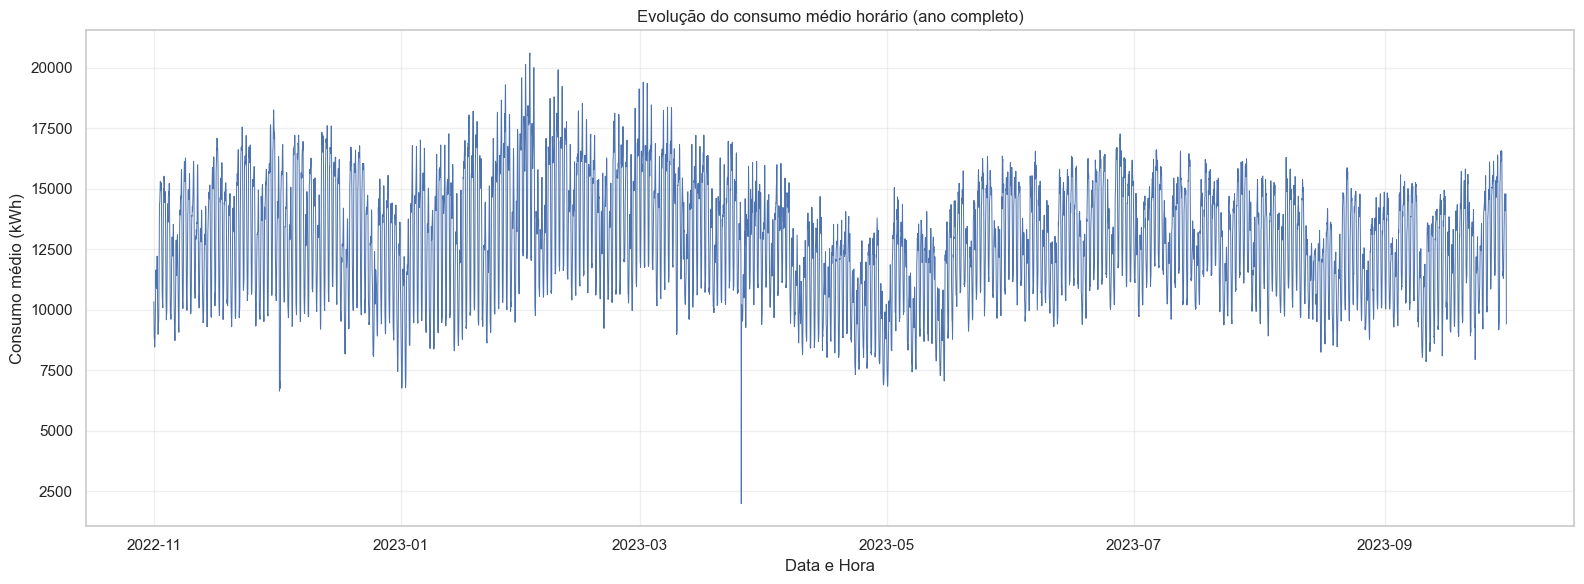

Primeiro dia do dataset: 2022-11-01
Último dia do dataset: 2023-09-30
10


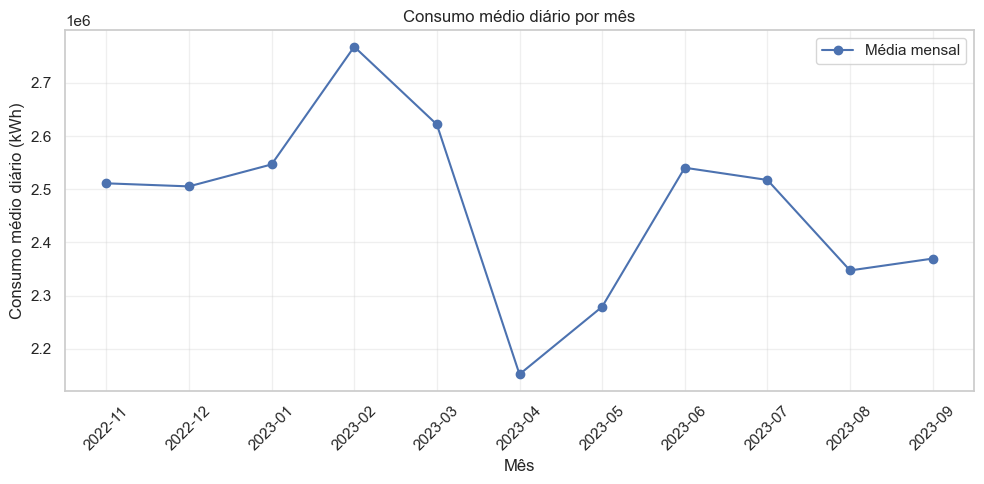

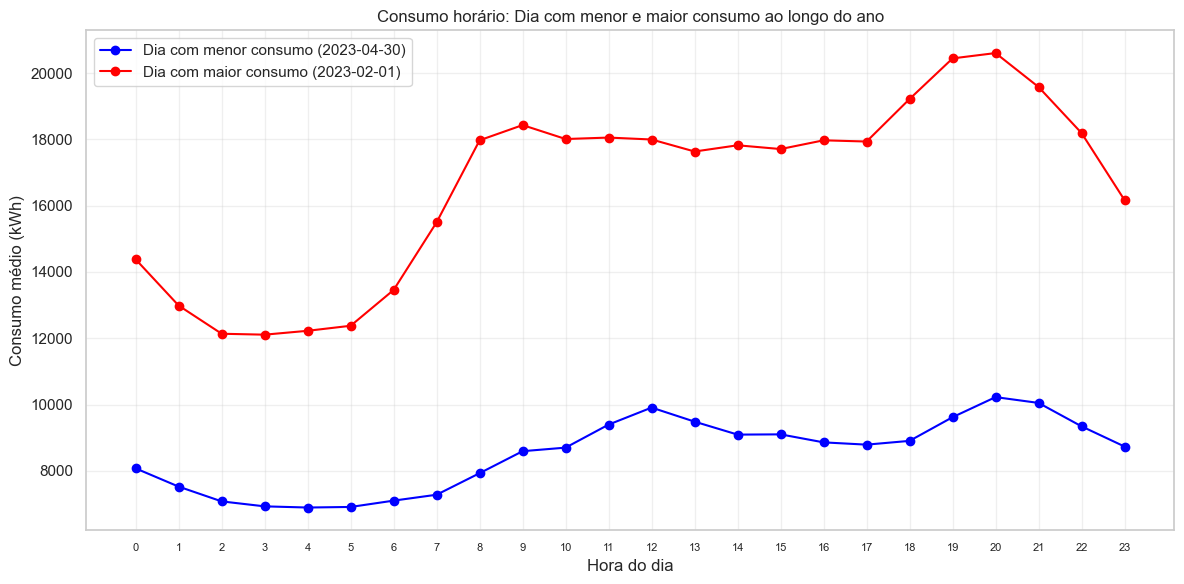

In [94]:
# Garantir datetime
df_ordenado['Data/Hora'] = pd.to_datetime(df_ordenado['Data/Hora'])

# Extrair campos temporais
df_ordenado['Data'] = df_ordenado['Data/Hora'].dt.date
df_ordenado['Hora'] = df_ordenado['Data/Hora'].dt.hour
df_ordenado['Mês'] = df_ordenado['Data/Hora'].dt.to_period('M').astype(str)

# 1. EVOLUÇÃO DO CONSUMO MÉDIO HORÁRIO (ao longo do ano todo)
media_horaria_total = df_ordenado.groupby('Data/Hora')['Energia ativa (kWh)'].mean().reset_index()

plt.figure(figsize=(16, 6))
plt.plot(media_horaria_total['Data/Hora'], media_horaria_total['Energia ativa (kWh)'], linewidth=0.7)
plt.title('Evolução do consumo médio horário (ano completo)')
plt.xlabel('Data e Hora')
plt.ylabel('Consumo médio (kWh)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Obter o primeiro e o último dia do dataset
primeiro_dia = df_ordenado['Data/Hora'].min().date()
ultimo_dia = df_ordenado['Data/Hora'].max().date()

print(f"Primeiro dia do dataset: {primeiro_dia}")
print(f"Último dia do dataset: {ultimo_dia}")

# Calcular a diferença entre o primeiro e o último dia em meses
amplitude_meses = (ultimo_dia.year - primeiro_dia.year) * 12 + ultimo_dia.month - primeiro_dia.month

print(amplitude_meses)

# 2. CONSUMO MÉDIO DIÁRIO POR MÊS (1 linha por mês)
consumo_diario = df_ordenado.groupby('Data')['Energia ativa (kWh)'].sum().reset_index()
consumo_diario['Mês'] = pd.to_datetime(consumo_diario['Data']).dt.to_period('M').astype(str)
media_mensal = consumo_diario.groupby('Mês')['Energia ativa (kWh)'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(media_mensal['Mês'], media_mensal['Energia ativa (kWh)'],
         marker='o', linestyle='-', label='Média mensal')
plt.title('Consumo médio diário por mês')
plt.xlabel('Mês')
plt.ylabel('Consumo médio diário (kWh)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Garantir datetime
df_ordenado['Data/Hora'] = pd.to_datetime(df_ordenado['Data/Hora'])

# Extrair campos temporais
df_ordenado['Data'] = df_ordenado['Data/Hora'].dt.date
df_ordenado['Hora'] = df_ordenado['Data/Hora'].dt.hour

# Calcular o consumo diário
consumo_diario = df_ordenado.groupby('Data')['Energia ativa (kWh)'].sum().reset_index()

# Encontrar os dias com menor e maior consumo ao longo do ano
dia_min = consumo_diario.loc[consumo_diario['Energia ativa (kWh)'].idxmin(), 'Data']
dia_max = consumo_diario.loc[consumo_diario['Energia ativa (kWh)'].idxmax(), 'Data']

# Filtrar os dados para o dia com menor consumo
df_dia_min = df_ordenado[df_ordenado['Data'] == dia_min]
media_dia_min = df_dia_min.groupby('Hora')['Energia ativa (kWh)'].mean().reset_index()

# Filtrar os dados para o dia com maior consumo
df_dia_max = df_ordenado[df_ordenado['Data'] == dia_max]
media_dia_max = df_dia_max.groupby('Hora')['Energia ativa (kWh)'].mean().reset_index()

# Criar gráfico com duas linhas: menor e maior consumo ao longo do ano
plt.figure(figsize=(12, 6))

plt.plot(media_dia_min['Hora'], media_dia_min['Energia ativa (kWh)'],
         marker='o', linestyle='-', label=f'Dia com menor consumo ({dia_min})', color='blue')
plt.plot(media_dia_max['Hora'], media_dia_max['Energia ativa (kWh)'],
         marker='o', linestyle='-', label=f'Dia com maior consumo ({dia_max})', color='red')

plt.title('Consumo horário: Dia com menor e maior consumo ao longo do ano')
plt.xlabel('Hora do dia')
plt.ylabel('Consumo médio (kWh)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24), fontsize=8)
plt.tight_layout()
plt.show()

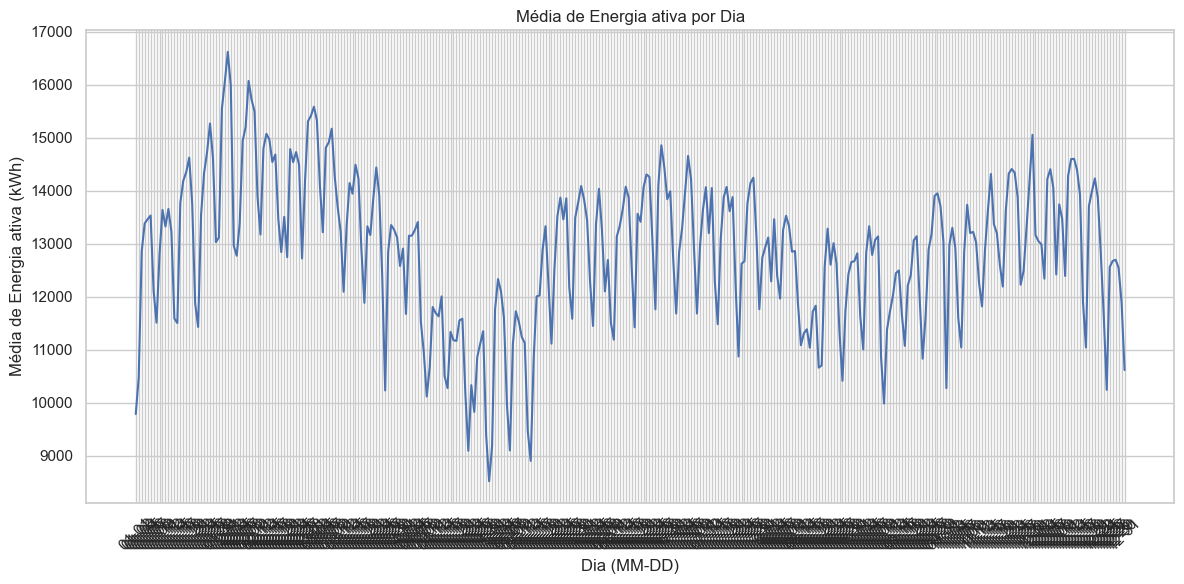

In [95]:
# Converter 'Dia' para datetime (caso ainda não esteja)
df_ordenado['Dia'] = pd.to_datetime(df_ordenado['Dia'])

# Criar uma nova coluna apenas com MM-DD para agrupamento
df_ordenado['Dia_MM_DD'] = df_ordenado['Dia'].dt.strftime('%m-%d')

# Calcular a média da energia por MM-DD
media_energia = df_ordenado.groupby('Dia_MM_DD')['Energia ativa (kWh)'].mean().reset_index()

# Ordenar os dados pela data (convertendo MM-DD para datetime com ano fictício)
media_energia['Dia_ordenado'] = pd.to_datetime('2000-' + media_energia['Dia_MM_DD'], format='%Y-%m-%d')
media_energia = media_energia.sort_values('Dia_ordenado')

# Plotar
plt.figure(figsize=(12, 6))
plt.plot(media_energia['Dia_MM_DD'], media_energia['Energia ativa (kWh)'])
plt.xticks(rotation=45)
plt.xlabel('Dia (MM-DD)')
plt.ylabel('Média de Energia ativa (kWh)')
plt.title('Média de Energia ativa por Dia')
plt.tight_layout()
plt.show()

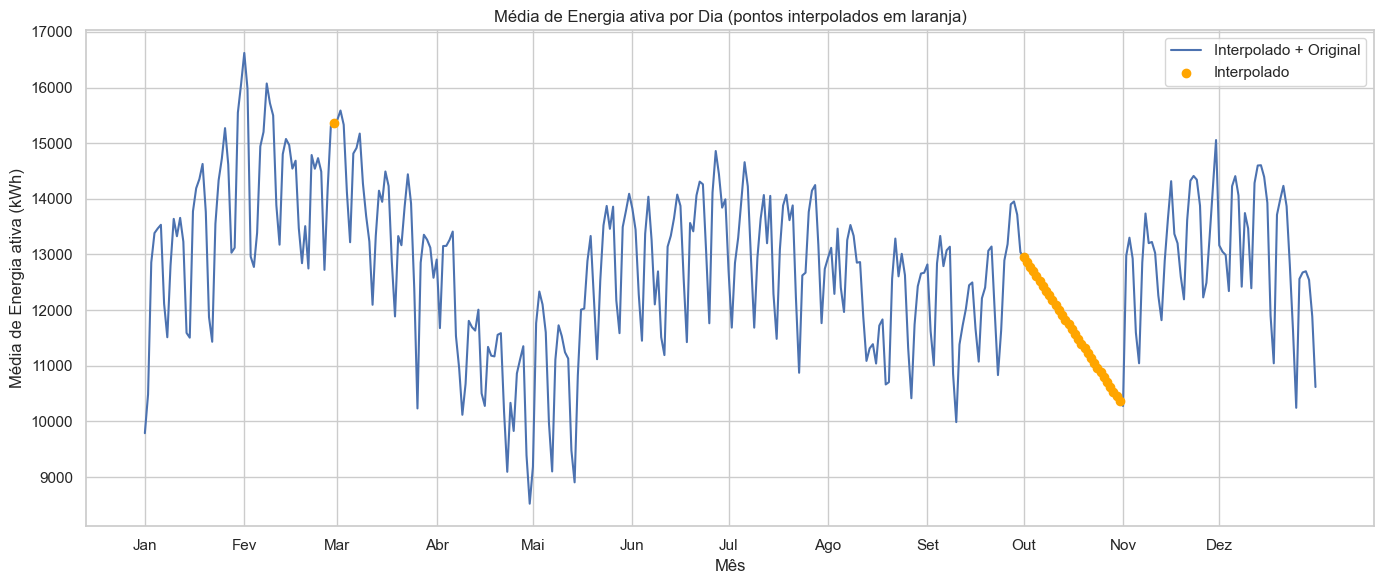

In [96]:
# Converter 'Dia' para datetime
df_ordenado['Dia'] = pd.to_datetime(df_ordenado['Dia'])

# Criar coluna com MM-DD
df_ordenado['Dia_MM_DD'] = df_ordenado['Dia'].dt.strftime('%m-%d')

# Calcular a média da energia por MM-DD
media_energia = df_ordenado.groupby('Dia_MM_DD')['Energia ativa (kWh)'].mean().reset_index()

# Criar todos os dias do ano fictício
todos_os_dias = pd.date_range('2000-01-01', '2000-12-31')
todos_os_dias_df = pd.DataFrame({
    'Dia_ordenado': todos_os_dias,
    'Dia_MM_DD': todos_os_dias.strftime('%m-%d')
})

# Mesclar com os dados calculados
media_completa = todos_os_dias_df.merge(media_energia, on='Dia_MM_DD', how='left')

# Salvar quais pontos eram NaN antes da interpolação
pontos_interpolados = media_completa['Energia ativa (kWh)'].isna()

# Interpolação linear
media_completa['Energia ativa (kWh)'] = media_completa['Energia ativa (kWh)'].interpolate(method='linear')

# Plotar linha completa
plt.figure(figsize=(14, 6))
plt.plot(media_completa['Dia_ordenado'], media_completa['Energia ativa (kWh)'], linestyle='-', label='Interpolado + Original')

# Plotar os pontos que foram interpolados em laranja
plt.scatter(
    media_completa.loc[pontos_interpolados, 'Dia_ordenado'],
    media_completa.loc[pontos_interpolados, 'Energia ativa (kWh)'],
    color='orange', label='Interpolado', zorder=5
)

# Personalização do gráfico
plt.xlabel('Mês')
plt.ylabel('Média de Energia ativa (kWh)')
plt.title('Média de Energia ativa por Dia (pontos interpolados em laranja)')
plt.xticks(
    pd.date_range('2000-01-01', '2000-12-01', freq='MS'),
    labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
    rotation=0
)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
df_ordenado.head()

,Data/Hora,Data,Hora,Código Postal,Energia ativa (kWh),Dia da Semana,Dia,delta_min,Mês,Dia_MM_DD
2381651,2022-11-01 00:00:00,2022-11-01,0,3000,9861.476029,Terça,2022-11-01,NaN,2022-11,11-01
1615005,2022-11-01 01:00:00,2022-11-01,1,3000,9145.277630,Terça,2022-11-01,60.0,2022-11,11-01
1363276,2022-11-01 02:00:00,2022-11-01,2,3000,8706.999091,Terça,2022-11-01,60.0,2022-11,11-01
1294134,2022-11-01 03:00:00,2022-11-01,3,3000,8412.438132,Terça,2022-11-01,60.0,2022-11,11-01
1345260,2022-11-01 04:00:00,2022-11-01,4,3000,8318.779050,Terça,2022-11-01,60.0,2022-11,11-01


In [110]:
# Garantir datetime e colunas auxiliares
df_ordenado['Data/Hora'] = pd.to_datetime(df_ordenado['Data/Hora'])
df_ordenado['Mês'] = df_ordenado['Data/Hora'].dt.month
df_ordenado['Dia'] = df_ordenado['Data/Hora'].dt.day
df_ordenado['Hora'] = df_ordenado['Data/Hora'].dt.hour

# Lista para armazenar novas linhas
novas_linhas = []

# Iterar por Código Postal
for codigo in df_ordenado['Código Postal'].unique():
    df_cp = df_ordenado[df_ordenado['Código Postal'] == codigo]

    df_sept = df_cp[df_cp['Mês'] == 9]
    df_nov = df_cp[df_cp['Mês'] == 11]

    # Verificação rápida: pula se faltar setembro ou novembro
    if df_sept.empty or df_nov.empty:
        continue

    media_sept = df_sept.groupby(['Dia', 'Hora'])['Energia ativa (kWh)'].mean().rename('Valor_setembro')
    media_nov = df_nov.groupby(['Dia', 'Hora'])['Energia ativa (kWh)'].mean().rename('Valor_novembro')

    df_razoes = pd.concat([media_sept, media_nov], axis=1).dropna()
    if df_razoes.empty:
        continue  # pula se não houver dados compatíveis

    df_razoes['Razão_nov_set'] = df_razoes['Valor_novembro'] / df_razoes['Valor_setembro']
    df_razoes['Valor_outubro'] = df_razoes['Valor_setembro'] * (1 + (df_razoes['Razão_nov_set'] - 1) * 0.5)
    df_razoes = df_razoes.reset_index()

    for _, row in df_razoes.iterrows():
        dia = int(row['Dia'])
        hora = int(row['Hora'])

        existe = df_cp[(df_cp['Mês'] == 10) & (df_cp['Dia'] == dia) & (df_cp['Hora'] == hora)]
        if existe.empty:
            nova_datahora = pd.Timestamp(year=2023, month=10, day=dia, hour=hora)
            nova_linha = {
                'Data/Hora': nova_datahora,
                'Energia ativa (kWh)': row['Valor_outubro'],
                'Código Postal': codigo,
                'Mês': 10,
                'Dia': dia,
                'Hora': hora
            }
            novas_linhas.append(nova_linha)

    # Duplicar dia 30 → dia 31 se aplicável
    df_30 = df_cp[(df_cp['Mês'] == 10) & (df_cp['Dia'] == 30)]
    for _, row in df_30.iterrows():
        hora = int(row['Hora'])
        existe_31 = df_cp[(df_cp['Mês'] == 10) & (df_cp['Dia'] == 31) & (df_cp['Hora'] == hora)]
        if existe_31.empty:
            nova_datahora = pd.Timestamp(year=2023, month=10, day=31, hour=hora)
            nova_linha = {
                'Data/Hora': nova_datahora,
                'Energia ativa (kWh)': row['Energia ativa (kWh)'],
                'Código Postal': codigo,
                'Mês': 10,
                'Dia': 31,
                'Hora': hora
            }
            novas_linhas.append(nova_linha)

# Adicionar novas linhas
df_ordenado = pd.concat([df_ordenado, pd.DataFrame(novas_linhas)], ignore_index=True)

# Recalcular Dia_MM_DD corretamente após adicionar novas linhas
df_ordenado['Dia_MM_DD'] = df_ordenado['Data/Hora'].dt.strftime('%m-%d')

# Reordenar
df_ordenado = df_ordenado.sort_values(by=['Código Postal', 'Data/Hora']).reset_index(drop=True)


In [111]:
df_ordenado.to_excel(r"C:\Users\toto9\Desktop\Seminário\dados\consumos4digitos_com_interpolacao.xlsx")

In [112]:
df_ordenado.columns

Index(['Data/Hora', 'Data', 'Hora', 'Código Postal', 'Energia ativa (kWh)',
       'Dia da Semana', 'Dia', 'delta_min', 'Mês', 'Dia_MM_DD',
       'Data_ficticia'],
      dtype='object')

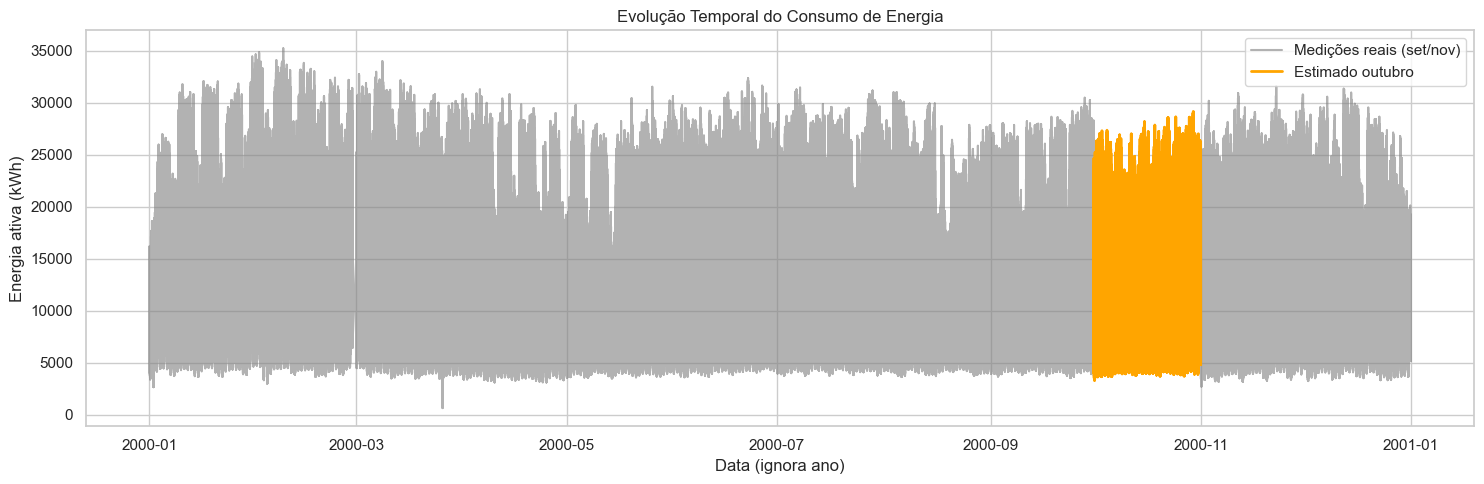

In [113]:
# Criar coluna auxiliar com ano fixo (ex: 2000), mantendo mês, dia e hora
df_ordenado['Data_ficticia'] = df_ordenado['Data/Hora'].apply(
    lambda x: x.replace(year=2000)
)

# Ordenar por essa data fictícia (ignora o ano original)
df_ordenado = df_ordenado.sort_values('Data_ficticia')

# Criar máscara para outubro
mascara_outubro = df_ordenado['Mês'] == 10

# Plotar os dados
plt.figure(figsize=(15, 5))

# Plotar dados reais (setembro e novembro)
plt.plot(df_ordenado.loc[~mascara_outubro, 'Data_ficticia'],
         df_ordenado.loc[~mascara_outubro, 'Energia ativa (kWh)'],
         label='Medições reais (set/nov)', color='gray', alpha=0.6)

# Plotar dados estimados (outubro)
plt.plot(df_ordenado.loc[mascara_outubro, 'Data_ficticia'],
         df_ordenado.loc[mascara_outubro, 'Energia ativa (kWh)'],
         label='Estimado outubro', color='orange', linewidth=2)

plt.title('Evolução Temporal do Consumo de Energia')
plt.xlabel('Data (ignora ano)')
plt.ylabel('Energia ativa (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(r"teste_interpolacao.png")
plt.show()

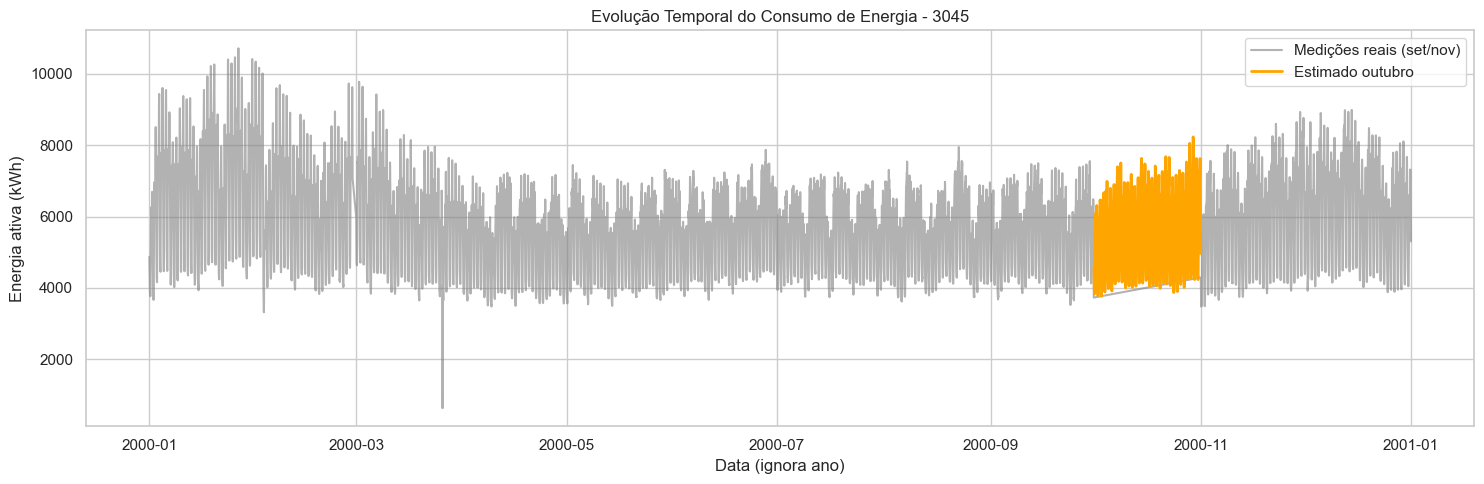

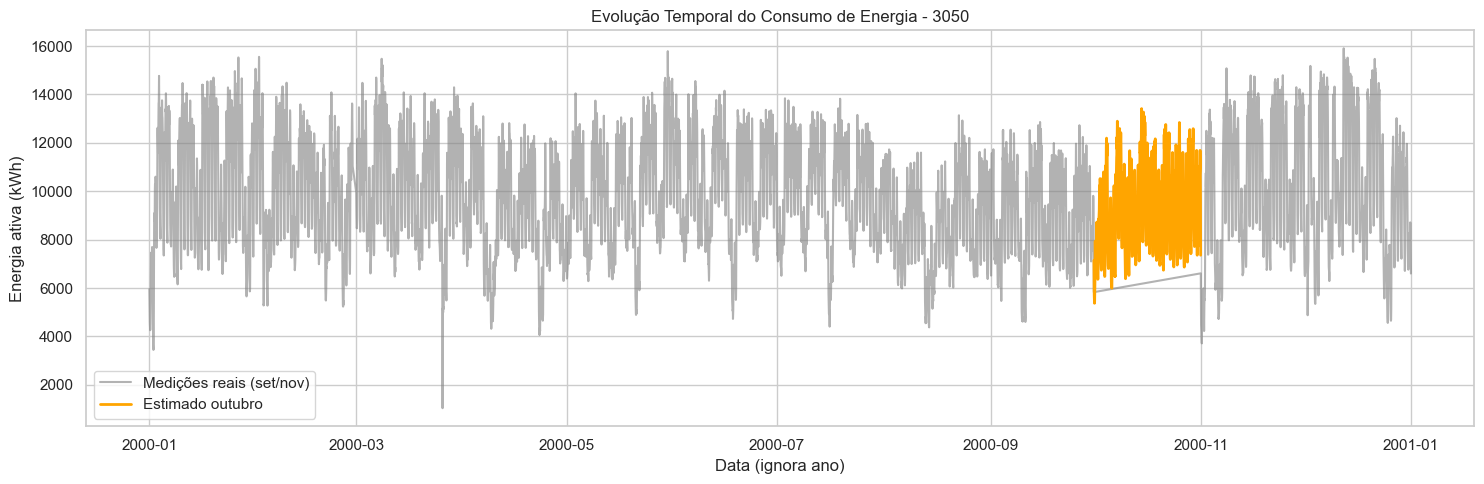

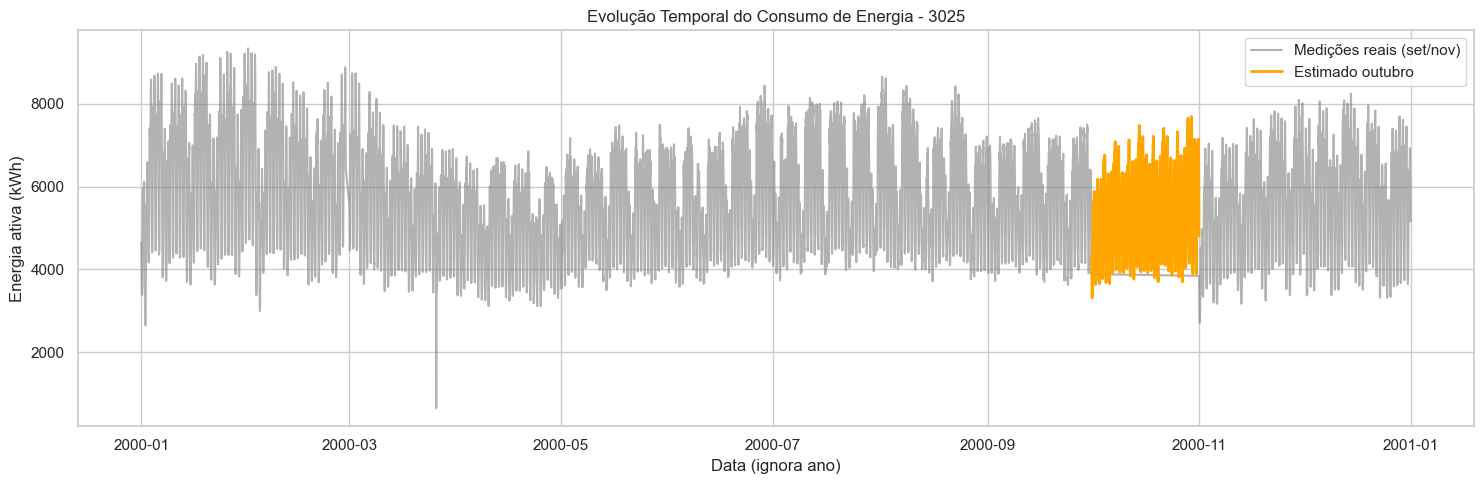

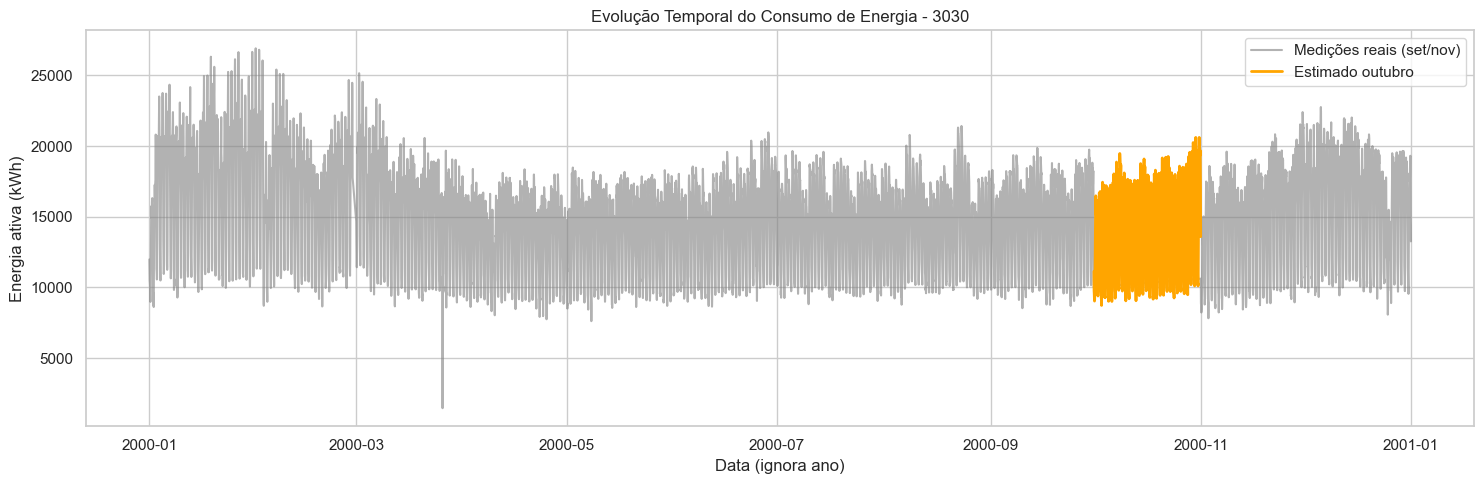

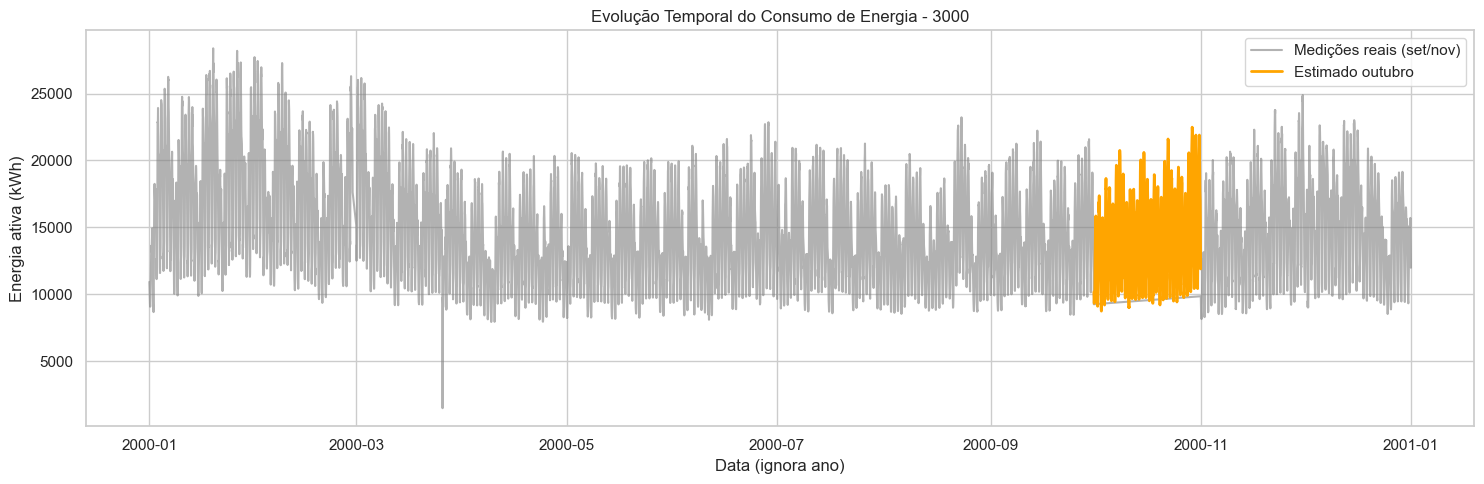

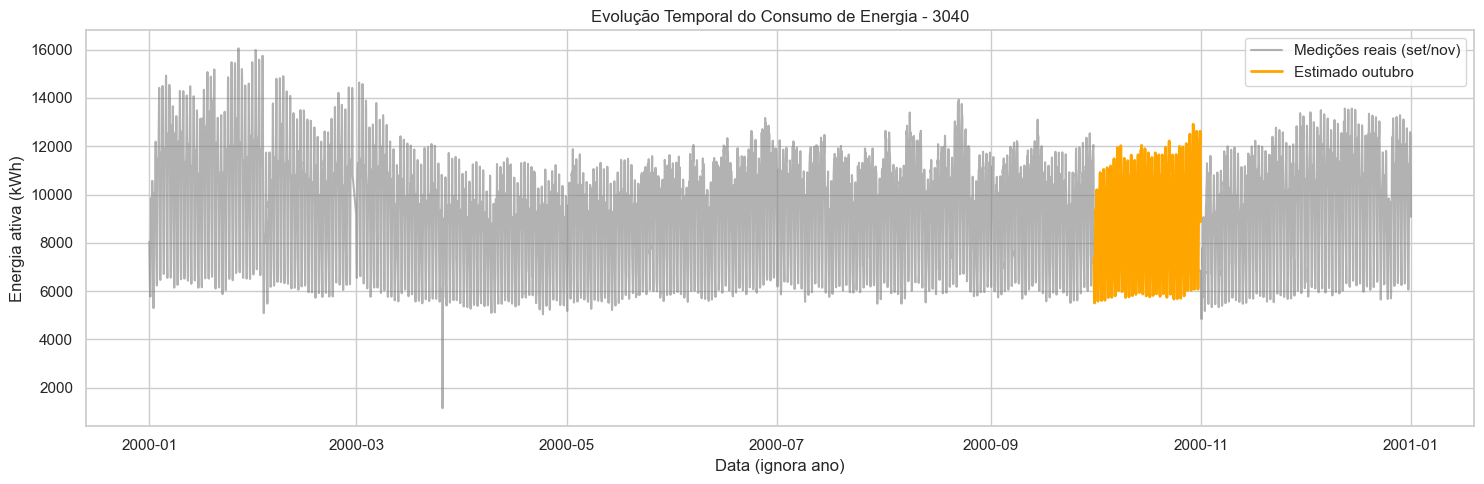

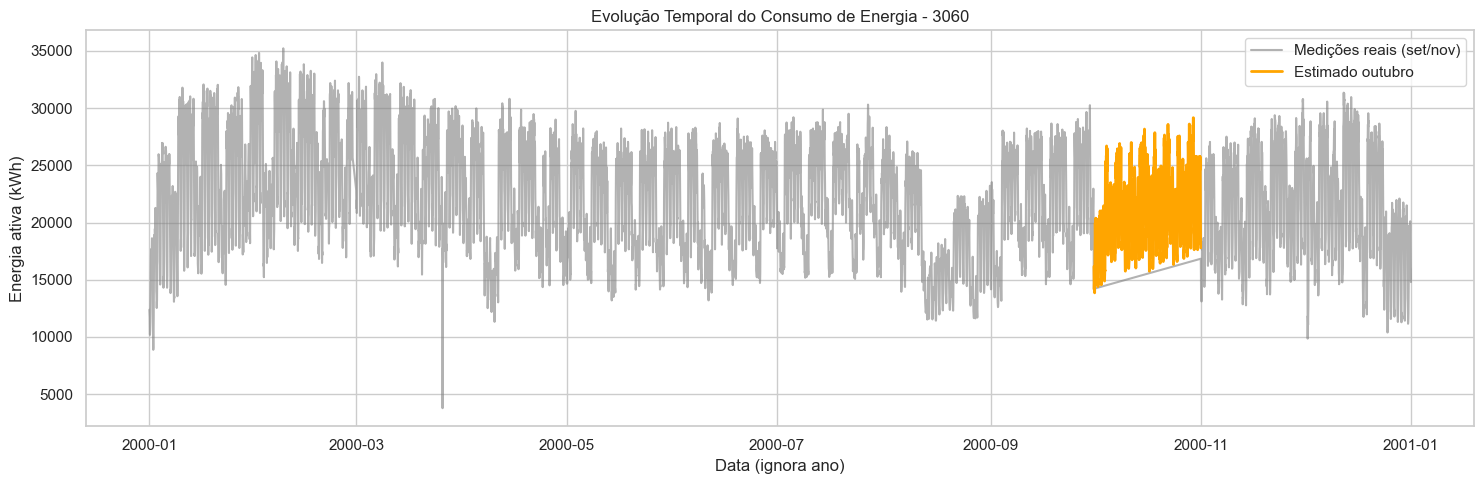

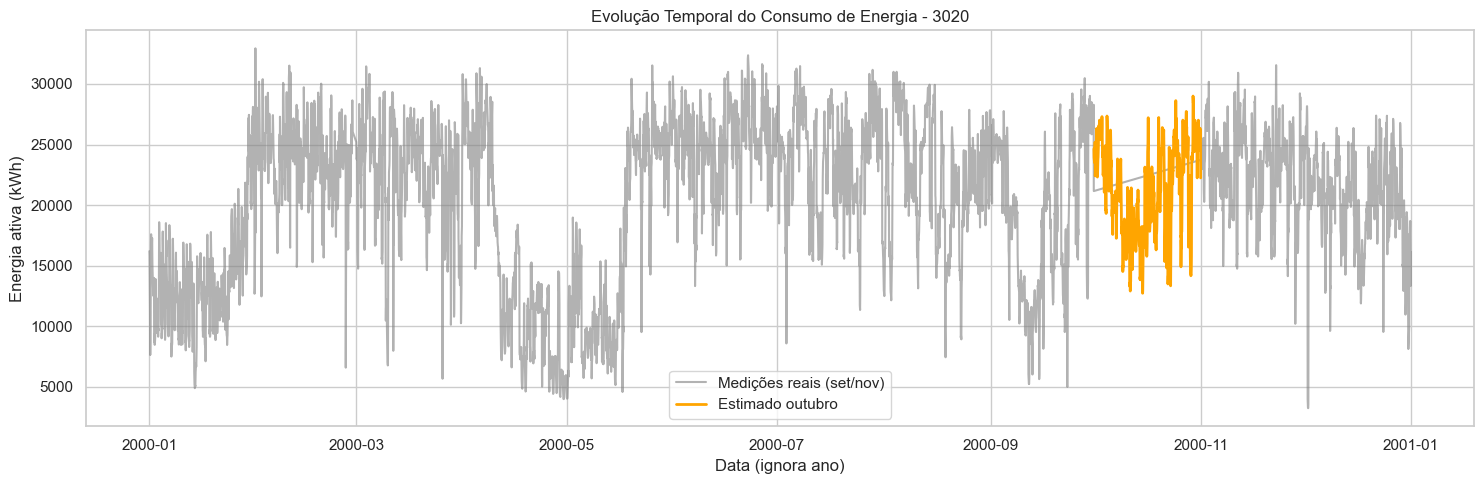

In [114]:
# Criar coluna auxiliar com ano fixo (ex: 2000), mantendo mês, dia e hora
df_ordenado['Data_ficticia'] = df_ordenado['Data/Hora'].apply(
    lambda x: x.replace(year=2000)
)

# Ordenar por essa data fictícia (ignora o ano original)
df_ordenado = df_ordenado.sort_values('Data_ficticia')

# Criar máscara para outubro
mascara_outubro = df_ordenado['Mês'] == 10

for i in df_ordenado["Código Postal"].unique():
    df_filtrado = df_ordenado[df_ordenado["Código Postal"] == i]
    # Plotar os dados
    plt.figure(figsize=(15, 5))

    # Plotar dados reais (setembro e novembro)
    plt.plot(df_filtrado.loc[~mascara_outubro, 'Data_ficticia'],
            df_filtrado.loc[~mascara_outubro, 'Energia ativa (kWh)'],
            label='Medições reais (set/nov)', color='gray', alpha=0.6)

    # Plotar dados estimados (outubro)
    plt.plot(df_filtrado.loc[mascara_outubro, 'Data_ficticia'],
            df_filtrado.loc[mascara_outubro, 'Energia ativa (kWh)'],
            label='Estimado outubro', color='orange', linewidth=2)

    plt.title(f'Evolução Temporal do Consumo de Energia - {i}')
    plt.xlabel('Data (ignora ano)')
    plt.ylabel('Energia ativa (kWh)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig(r"teste_interpolacao.png")
    plt.show()

In [115]:
df_ordenado[df_ordenado["Mês"] == 10].head()

,Data/Hora,Data,Hora,Código Postal,Energia ativa (kWh),Dia da Semana,Dia,delta_min,Mês,Dia_MM_DD,Data_ficticia
34296,2023-10-01,NaN,0,3030,11138.092287,NaN,1,NaN,10,10-01,2000-10-01
51816,2023-10-01,NaN,0,3045,4567.509088,NaN,1,NaN,10,10-01,2000-10-01
43056,2023-10-01,NaN,0,3040,7359.706227,NaN,1,NaN,10,10-01,2000-10-01
16776,2023-10-01,NaN,0,3020,24645.792429,NaN,1,NaN,10,10-01,2000-10-01
25536,2023-10-01,NaN,0,3025,4338.282761,NaN,1,NaN,10,10-01,2000-10-01


In [116]:
# Passo 1: Calcular a soma da energia no dia 10 de fevereiro (referência por Código Postal)
referencia = df_ordenado[df_ordenado['Dia_MM_DD'] == '02-10']
referencia = referencia.groupby('Código Postal')['Energia ativa (kWh)'].sum().reset_index()
referencia = referencia.rename(columns={'Energia ativa (kWh)': 'Valor_Referencia'})

# Passo 2: Fazer merge para trazer o valor de referência para todas as linhas
df_com_referencia = df_ordenado.merge(referencia, on='Código Postal', how='left')

# Passo 3: Normalizar os valores com base na soma diária do dia 10/02
df_com_referencia['Valor_Normalizado'] = df_com_referencia['Energia ativa (kWh)'] / df_com_referencia['Valor_Referencia']

# Passo 4: Consolidar os dados por Código Postal e par mês-dia
df_consolidado = df_com_referencia.groupby(['Código Postal', 'Dia_MM_DD']).agg({
    'Valor_Normalizado': 'sum'  # soma dos valores normalizados por dia
}).reset_index()

In [117]:
df_consolidado.head()
df_consolidado.to_csv(r"C:\Users\toto9\Desktop\Seminário\dados\consumo_diario_normalizado_cp4digitos.csv")

In [106]:
df_mais_23_registos.drop(columns=["delta_min"], inplace=True)

In [107]:
# Converter a coluna 'Dia' de YYYY-MM-DD para MM-DD
df_mais_23_registos['Dia'] = pd.to_datetime(df_mais_23_registos['Dia']).dt.strftime('%m-%d')

# Criar a nova coluna 'Hora' com valores de 0 a 23
df_mais_23_registos['Hora'] = df_mais_23_registos['Data/Hora'].dt.hour

df_mais_23_registos.head()

,Data/Hora,Código Postal,Energia ativa (kWh),Data,Hora,Código Postal 4 Dígitos,Código Postal 3 Dígitos,Dia
2566881,2024-02-01 00:00:00+00:00,3000-003,32.061177,2024-02-01,0,3000,3,02-01
272789,2024-02-01 01:00:00+00:00,3000-003,26.345827,2024-02-01,1,3000,3,02-01
3639286,2024-02-01 02:00:00+00:00,3000-003,24.484873,2024-02-01,2,3000,3,02-01
708798,2024-02-01 03:00:00+00:00,3000-003,22.702250,2024-02-01,3,3000,3,02-01
441615,2024-02-01 04:00:00+00:00,3000-003,20.844550,2024-02-01,4,3000,3,02-01


In [108]:
df_mais_23_registos_limpo = df_mais_23_registos.drop(columns=["Data/Hora", "Data"])
df_mais_23_registos_limpo.to_csv(r"C:\Users\toto9\Desktop\Seminário\dados\consumos_completos_fevereiro_cp_7_digitos.csv")